# Explorando conjuntos de datos con pandas y Matplotlib

El conjunto de datos que exploraremos contiene datos anuales sobre los flujos de migrantes internacionales registrados por los países de destino. Los datos presentan tanto las entradas como las salidas según el lugar de nacimiento, ciudadanía o lugar de residencia anterior/siguiente tanto para extranjeros como para nacionales.

Conjunto de datos: Inmigración a Canadá de 1980 a 2013 - Flujos migratorios internacionales hacia y desde países seleccionados - Revisión de 2015 del sitio web de las Naciones Unidas.

# Descarga y preparación de los datos

In [ ]:
# importar los módulos para el análisis de datos: pandas y numpy
import numpy as np  # para cálculos en Python
import pandas as pd # para estructura de datos

In [ ]:
# descarga y lectura de los datos
df_can = pd.read_excel('Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Datos descargados y leídos con éxito!')

Datos descargados y leídos con éxito!


In [ ]:
# osbservamos los primeros cinco elementos
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [ ]:
# los últimos cinco elementos
df_can.tail()

Type    Coverage          OdName  AREA AreaName  REG  \
190  Immigrants  Foreigners        Viet Nam   935     Asia  920   
191  Immigrants  Foreigners  Western Sahara   903   Africa  912   
192  Immigrants  Foreigners           Yemen   935     Asia  922   
193  Immigrants  Foreigners          Zambia   903   Africa  910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa  910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
190  South-Eastern Asia  902  Developing regions  1191  ...  1816  1852  3153   
191     Northern Africa  902  Developing regions     0  ...     0     0     1   
192        Western Asia  902  Developing regions     1  ...   124   161   140   
193      Eastern Africa  902  Developing regions    11  ...    56    91    77   
194      Eastern Africa  902  Developing regions    72  ...  1450   615   454   

     2007  2008  2009  2010  2011  2012  2013  
190  2574  1784  2171  1942  1723  1731  2112  
191     0     0     0     0     0     0     0  
192   122   133   128   211   160   174   217  
193    71    64    60   102    69    46    59  
194   663   611   508   494   434   437   407  

[5 rows x 43 columns]

In [ ]:
# analizamos la dimensión del dataframe
print(df_can.shape)

(195, 43)


In [ ]:
# breve resumen del dataframe
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [ ]:
# información general del dataframe
print('Cantidad de Filas y columnas:', df_can.shape, '\n')
print('Nombre de las columnas:',df_can.columns, '\n')
print('Información sobre el dataset:', '\n')
df_can.info()

Cantidad de Filas y columnas: (195, 43) 

Nombre de las columnas: Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object') 

Información sobre el dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA 

In [ ]:
# índices utilizados
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [ ]:
# buscar duplicados
df_can.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool>

In [ ]:
# identificar valores faltantes
df_can.isnull().values.any()

False

In [ ]:
print(df_can.isnull().sum())

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64


In [ ]:
datos_faltantes = df_can.isnull()
datos_faltantes.head(5)

Type  Coverage  OdName   AREA  AreaName    REG  RegName    DEV  DevName  \
0  False     False   False  False     False  False    False  False    False   
1  False     False   False  False     False  False    False  False    False   
2  False     False   False  False     False  False    False  False    False   
3  False     False   False  False     False  False    False  False    False   
4  False     False   False  False     False  False    False  False    False   

    1980  ...   2004   2005   2006   2007   2008   2009   2010   2011   2012  \
0  False  ...  False  False  False  False  False  False  False  False  False   
1  False  ...  False  False  False  False  False  False  False  False  False   
2  False  ...  False  False  False  False  False  False  False  False  False   
3  False  ...  False  False  False  False  False  False  False  False  False   
4  False  ...  False  False  False  False  False  False  False  False  False   

    2013  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 43 columns]

In [ ]:
# contar valores faltantes
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print (datos_faltantes[column].value_counts())
    print("")

Type
False    195
Name: Type, dtype: int64

Coverage
False    195
Name: Coverage, dtype: int64

OdName
False    195
Name: OdName, dtype: int64

AREA
False    195
Name: AREA, dtype: int64

AreaName
False    195
Name: AreaName, dtype: int64

REG
False    195
Name: REG, dtype: int64

RegName
False    195
Name: RegName, dtype: int64

DEV
False    195
Name: DEV, dtype: int64

DevName
False    195
Name: DevName, dtype: int64

1980
False    195
Name: 1980, dtype: int64

1981
False    195
Name: 1981, dtype: int64

1982
False    195
Name: 1982, dtype: int64

1983
False    195
Name: 1983, dtype: int64

1984
False    195
Name: 1984, dtype: int64

1985
False    195
Name: 1985, dtype: int64

1986
False    195
Name: 1986, dtype: int64

1987
False    195
Name: 1987, dtype: int64

1988
False    195
Name: 1988, dtype: int64

1989
False    195
Name: 1989, dtype: int64

1990
False    195
Name: 1990, dtype: int64

1991
False    195
Name: 1991, dtype: int64

1992
False    195
Name: 1992, dtype: int64

1993

In [ ]:
# valores únicos para cada columna
df_can.nunique()

Type          1
Coverage      2
OdName      195
AREA          6
AreaName      6
REG          22
RegName      22
DEV           2
DevName       2
1980        103
1981        103
1982        101
1983        100
1984        106
1985        103
1986        109
1987        115
1988        115
1989        116
1990        118
1991        121
1992        139
1993        144
1994        142
1995        141
1996        147
1997        145
1998        141
1999        144
2000        151
2001        155
2002        148
2003        149
2004        156
2005        156
2006        155
2007        159
2008        161
2009        157
2010        163
2011        160
2012        163
2013        162
dtype: int64

In [ ]:
# tipos de datos por columna
print(df_can.dtypes)

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object


In [ ]:
# contar tipos de datos
numericos = df_can.select_dtypes(include=['int', 'float']).shape[1]
objetos = df_can.select_dtypes(include='object').shape[1]
print(f"Número de columnas numéricas: {numericos}")
print(f"Número de columnas de tipo objeto: {objetos}")

Número de columnas numéricas: 37
Número de columnas de tipo objeto: 6


In [ ]:
print("\nResumen estadístico:")
print(df_can.describe())


Resumen estadístico:
             AREA          REG         DEV          1980          1981  \
count  195.000000   195.000000  195.000000    195.000000    195.000000   
mean   912.764103  1249.015385  901.753846    508.394872    566.989744   
std     13.082835  1185.526885    0.431878   1949.588546   2152.643752   
min    903.000000   905.000000  901.000000      0.000000      0.000000   
25%    903.000000   914.000000  902.000000      0.000000      0.000000   
50%    908.000000   922.000000  902.000000     13.000000     10.000000   
75%    922.000000   925.500000  902.000000    251.500000    295.500000   
max    935.000000  5501.000000  902.000000  22045.000000  24796.000000   

               1982          1983          1984         1985         1986  \
count    195.000000    195.000000    195.000000   195.000000   195.000000   
mean     534.723077    387.435897    376.497436   358.861538   441.271795   
std     1866.997511   1204.333597   1198.246371  1079.309600  1225.576630   
min

In [ ]:
print("\nResumen estadístico categóricas:")
print(df_can.describe(include=['object']))


Resumen estadístico categóricas:
              Type    Coverage       OdName AreaName       RegName  \
count          195         195          195      195           195   
unique           1           2          195        6            22   
top     Immigrants  Foreigners  Afghanistan   Africa  Western Asia   
freq           195         194            1       54            18   

                   DevName  
count                  195  
unique                   2  
top     Developing regions  
freq                   147  


limpiamos el conjunto de datos para eliminar las columnas que consideramos inesesarias para el análisis

In [ ]:
# eliminamos las columnas
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# visualizamos nuevamente el daframe para ver los cambios
df_can.head()

OdName AreaName          RegName             DevName  1980  1981  \
0     Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1         Albania   Europe  Southern Europe   Developed regions     1     0   
2         Algeria   Africa  Northern Africa  Developing regions    80    67   
3  American Samoa  Oceania        Polynesia  Developing regions     0     1   
4         Andorra   Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...     0     0     1     0     0     0     0   
4     0     0     0     0  ...     0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  
3     0     0     0  
4     0     1     1  

[5 rows x 38 columns]

In [ ]:
# cambiamos los nombres de las columnas para que queden mas y tengan mas sentido
df_can.rename(columns={'OdName':'Pais', 'AreaName':'Continente','RegName':'Region'}, inplace=True)
df_can.head()

Pais Continente           Region             DevName  1980  1981  \
0     Afghanistan       Asia    Southern Asia  Developing regions    16    39   
1         Albania     Europe  Southern Europe   Developed regions     1     0   
2         Algeria     Africa  Northern Africa  Developing regions    80    67   
3  American Samoa    Oceania        Polynesia  Developing regions     0     1   
4         Andorra     Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...     0     0     1     0     0     0     0   
4     0     0     0     0  ...     0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  
3     0     0     0  
4     0     1     1  

[5 rows x 38 columns]

Chequear que todas las etiquetas de las columnas sean de tipo string, para asegurar la coherencia

In [ ]:
# chequeamos los tipos de etiqueta
all(isinstance(column, str) for column in df_can.columns)

False

Como devolvió False vamos a cambiar todos a tipo string


In [ ]:
# cambiamos a tipo string
df_can.columns = list(map(str, df_can.columns))

# chequeamos los tipos de etiqueta nuevamente
all(isinstance(column, str) for column in df_can.columns)

True

Para buscar países de forma más rápida vamos a establecer la columna pais como índice

In [ ]:
# establecer país como índice
df_can.set_index('Pais', inplace=True)

# visualizamos
df_can.head()

Continente           Region             DevName  1980  1981  \
Pais                                                                         
Afghanistan          Asia    Southern Asia  Developing regions    16    39   
Albania            Europe  Southern Europe   Developed regions     1     0   
Algeria            Africa  Northern Africa  Developing regions    80    67   
American Samoa    Oceania        Polynesia  Developing regions     0     1   
Andorra            Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2004  2005  2006  2007  \
Pais                                          ...                           
Afghanistan       39    47    71   340   496  ...  2978  3436  3009  2652   
Albania            0     0     0     0     1  ...  1450  1223   856   702   
Algeria           71    69    63    44    69  ...  3616  3626  4807  3623   
American Samoa     0     0     0     0     0  ...     0     0     1     0   
Andorra            0     0     0     0     2  ...     0     0     1     1   

                2008  2009  2010  2011  2012  2013  
Pais                                                
Afghanistan     2111  1746  1758  2203  2635  2004  
Albania          560   716   561   539   620   603  
Algeria         4005  5393  4752  4325  3774  4331  
American Samoa     0     0     0     0     0     0  
Andorra            0     0     0     0     1     1  

[5 rows x 37 columns]

Vamos a agregar una columna con el total de inmigrantes por cada país

In [ ]:
# agregamos la columna Total y visualizamos el dataframe nuevemente para ver el resultado
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

<ipython-input-24-aa2ac8810aee>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


Continente           Region             DevName  1980  1981  \
Pais                                                                         
Afghanistan          Asia    Southern Asia  Developing regions    16    39   
Albania            Europe  Southern Europe   Developed regions     1     0   
Algeria            Africa  Northern Africa  Developing regions    80    67   
American Samoa    Oceania        Polynesia  Developing regions     0     1   
Andorra            Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Pais                                          ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Pais                                                 
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [ ]:
# visualizamos nuevamente la dimensión del dataframe, para chequear que tenga una columna más (de 37 a 38)
print('dimensión de los datos:', df_can.shape)

dimensión de los datos: (195, 38)


In [ ]:
# para poder realizar los gráficos, vamos a crear una lista de años (desde 1980 a 2013)
fechas = list(map(str, range(1980, 2014)))

fechas

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualización con Matplotlib

Importamos la librería

In [ ]:
# utilizamos backend online
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# librería para los gráficos de gofres (waffle)
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

# última versión de Matplotlib
print('Versión de Matplotlib: ', mpl.__version__)

Versión de Matplotlib:  3.7.1


## Gráficos de área

Este tipo de gráficos se utilizan para representar datos numéricos a lo largo del tiempo o en diferentes categorías. Muestran la acumulación de valores, permitiendo comparar tendencias de diferentes series de datos. Pueden ser apilados o superpuestos según para lo que fuere necesario

In [ ]:
# ordenamos por Total
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# tomamos los 5 mejores
df_top5 = df_can.head()

# cambiamos el dataframe
df_top5 = df_top5[fechas].transpose()

df_top5.head()

Pais  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      

Pais  Philippines  Pakistan  
1980         6051       978  
1981         5921       972  
1982         5249      1201  
1983         4562       900  
1984         3801       668

Los gráficos de área se apilan de forma predeterminada. Y para producir un gráfico de áreas apiladas, cada columna debe tener todos valores positivos o todos negativos (cualquier valor NaN, tendrá el valor predeterminado 0). Para producir un gráfico desapilado, hay que establecer el parámetro stackeden en valor False.

Graficamos la tendencia de inmigración de los 5 principales países

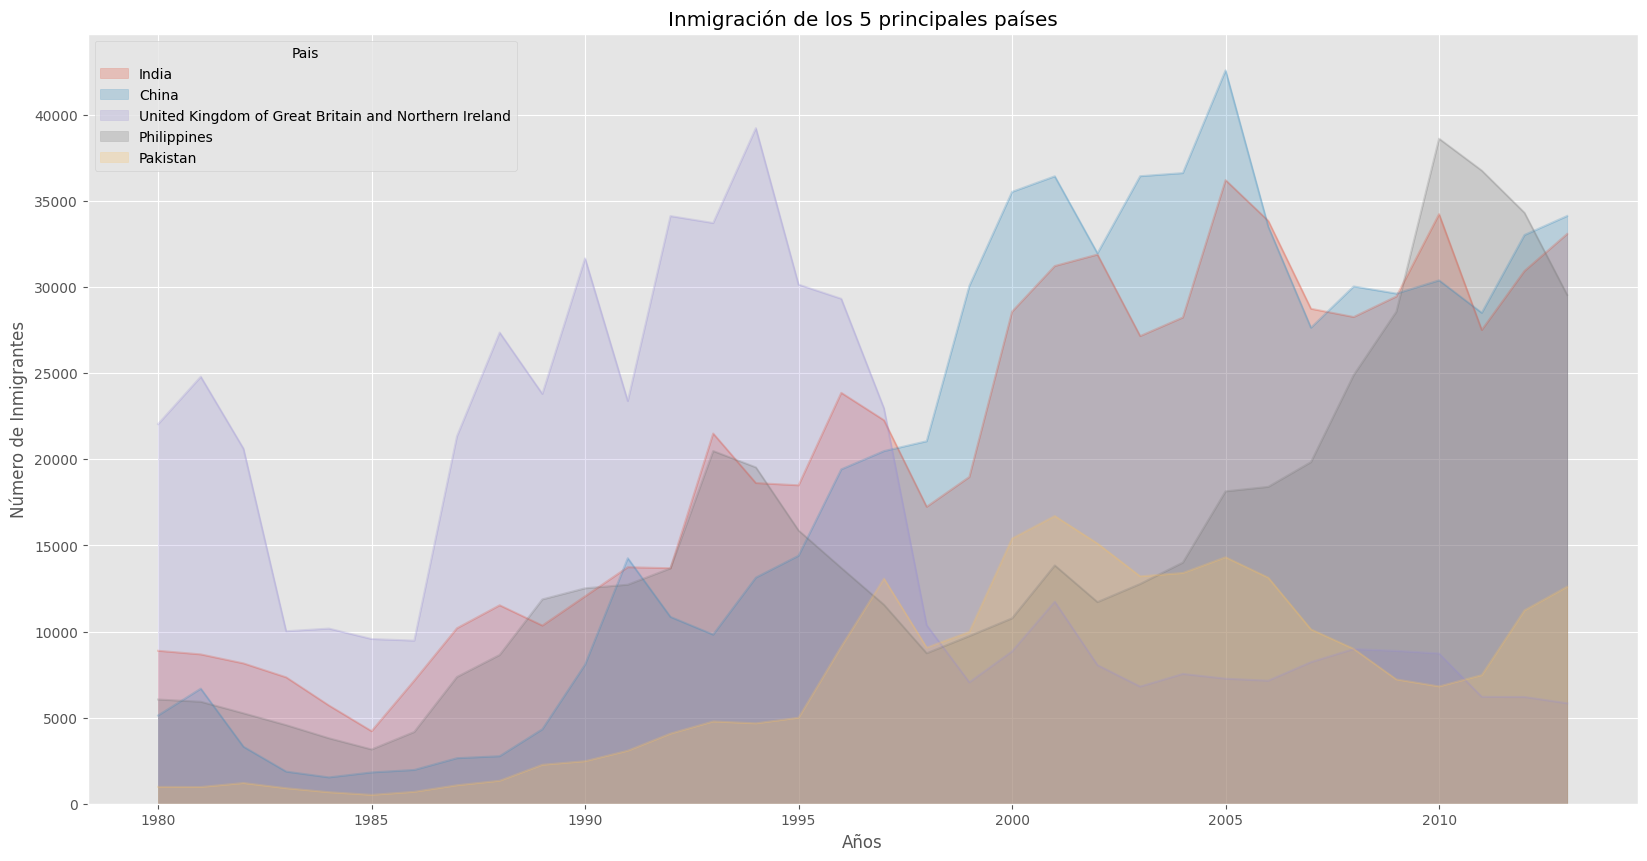

In [ ]:
# cambiamos los valores del índice del dataframe a entero para graficar
df_top5.index = df_top5.index.map(int)

# graficamos
df_top5.plot(kind='area',
            alpha=0.25,  # valor de la transparencia
            stacked=False,
            figsize=(20, 10))

# agregamos títulos
plt.title('Inmigración de los 5 principales países')
plt.ylabel('Número de Inmigrantes')
plt.xlabel('Años')

# mostramos el gráfico
plt.show()

Graficamos los 5 países que menos contribuyeron a la inmigración a Canadá entre 1980 y 2013, con valor transparencia de 0,45.

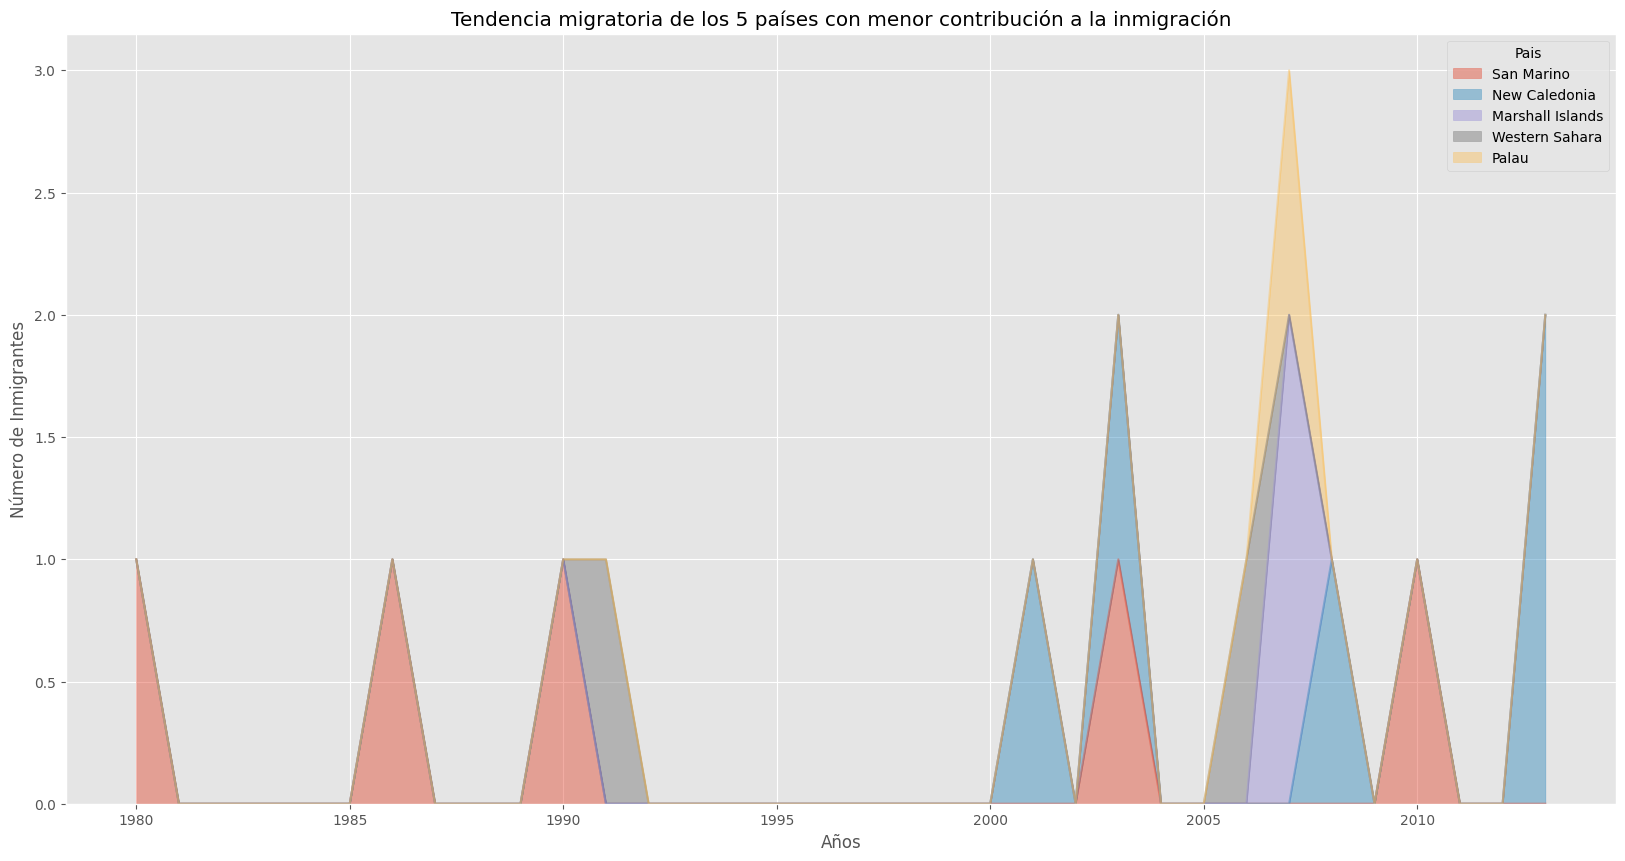

In [ ]:
# definimos un nuevo df
df_least5 = df_can.tail(5)

# transponemos
df_least5 = df_least5[fechas].transpose()
df_least5.head()

# cambiamos los valores del índice a enteros
df_least5.index = df_least5.index.map(int)

# graficamos
df_least5.plot(kind='area',
               alpha=0.45,
               figsize=(20, 10))

# agregamos títulos
plt.title('Tendencia migratoria de los 5 países con menor contribución a la inmigración')
plt.ylabel('Número de Inmigrantes')
plt.xlabel('Años')

# mostramos el gráfico
plt.show()

Podemos graficar lo mismo utilizando una instancia de Matplotlib llamada Axes. Utilizamos esta instancia y la almacenamos en una variable, (por ejemplo ax), para luego poder agregar el resto de los elementos, ax.set_title().

Text(0.5, 0, 'Años')

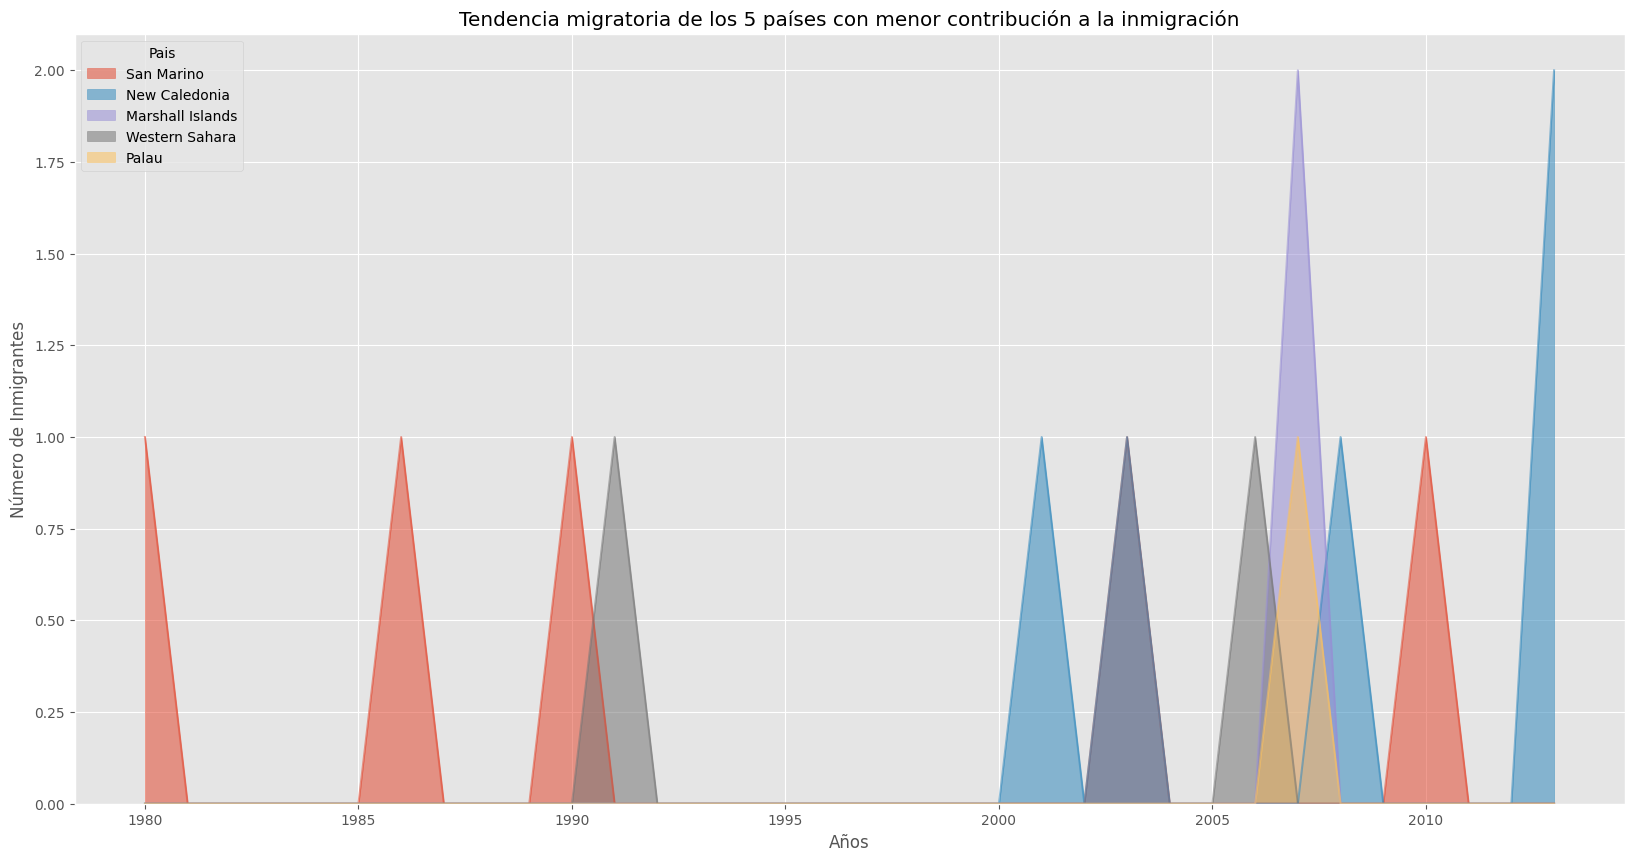

In [ ]:
df_least5 = df_can.tail(5)

# transponemos
df_least5 = df_least5[fechas].transpose()

df_least5.head()

# cambiamos los valores del índice a enteros
df_least5.index = df_least5.index.map(int)

# graficamos
ax = df_least5.plot(kind='area',
                    alpha=0.55,
                    stacked=False, # para que no quede apilado
                    figsize=(20, 10))

# agregamos los títulos
ax.set_title('Tendencia migratoria de los 5 países con menor contribución a la inmigración')
ax.set_ylabel('Número de Inmigrantes')
ax.set_xlabel('Años')


## Histogramas

Los histogramas representan la distribución de datos numéricos continuos en intervalos discretos llamados "bins" (contenedores). Cada bin representa un rango de valores y la altura de la barra indica la frecuencia de datos en ese rango. Este tipo de gáraficos son útiles para comprender la distribución de datos y detectar patrones.
Generlamente es necesario modificar el tamaño del contenedor para que la distribución se muestre bien.

A continuación queremos saber: ¿Cuál es la distribución de frecuencia del número (población) de nuevos inmigrantes a Canadá en 2013 de los distintos países?

In [ ]:
# visualizamos los datos de 2013
df_can['2013'].head()

Pais
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [ ]:
# np.histogram nos devuelve 2 valores
conteo_frec, rango_bin = np.histogram(df_can['2013'])

print(conteo_frec) # conteo de la frecuencia
print(rango_bin) # rango de contenedores, por defecto 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Su lectura sería la siguiente:
- 178 países aportaron entre 0 y 3412,9 inmigrantes.
- 11 países aportaron entre 3.412,9 y 6.825,8 inmigrantes
- 1 país aportó entre 6285,8 y 10238,7 inmigrantes, y así sucesivamente.

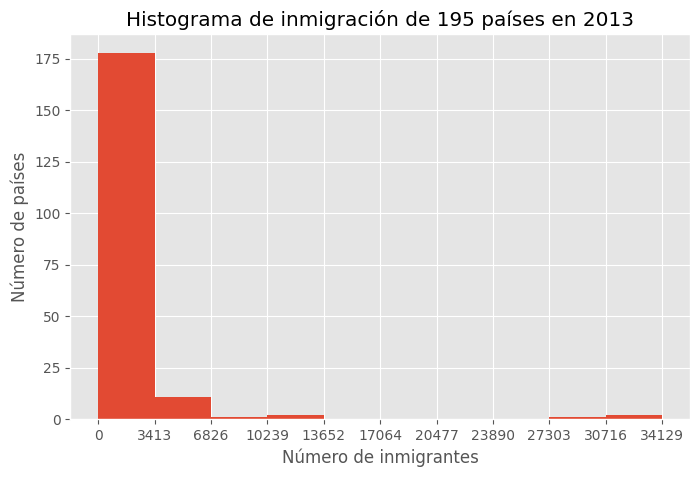

In [ ]:
# graficcamos utilizando kind='hist'
# agregamos xticks para que las etiquetas del eje x coincidan con el tamaño del contenedor
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=rango_bin)

# agregamos un título
plt.title('Histograma de inmigración de 195 países en 2013')

# agregamos etiqueta en eje y
plt.ylabel('Número de países')

# agregamos etiqueta en eje x
plt.xlabel('Número de inmigrantes')

# mostramos el gráfico
plt.show()

Ahora queremos saber: Cuál es la distribución de la inmigración para China, India y Philippines durante los años 1980 - 2013?

In [ ]:
# veamos primero como esta nuestro df
df_can.head()

Continente  \
Pais                                                            
India                                                    Asia   
China                                                    Asia   
United Kingdom of Great Britain and Northern Ir...     Europe   
Philippines                                              Asia   
Pakistan                                                 Asia   

                                                                Region  \
Pais                                                                     
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Pais                                                                            
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Pais                                                                      
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Pais                                                                   ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2005   2006   2007  \
Pais                                                                      
India                                               36210  33848  28742   
China                                               42584  33518  27642   
United Kingdom of Great Britain and Northern Ir...   7258   7140   8216   
Philippines                                         18139  18400  19837   
Pakistan                                            14314  13127  10124   

                                                     2008   2009   2010  \
Pais                                                                      
India                                               28261  29456  34235   
China                                               30037  29622  30391   
United Kingdom of Great Britain and Northern Ir...   8979   8876   8724   
Philippines                                         24887  28573  38617   
Pakistan                                             8994   7217   6811   

                                                     2011   2012   2013  \
Pais                                                                      
India                                               27509  30933  33087   
China                                               28502  33024  34129   
United Kingdom of Great Britain and Northern Ir...   6204   6195   5827   
Philippi

In [ ]:
# visualizamos el df con los países seleccionados
df_can.loc[['China', 'India', 'Philippines'], fechas]

1980  1981  1982  1983  1984  1985  1986   1987   1988   1989  \
Pais                                                                         
China        5123  6682  3308  1863  1527  1816  1960   2643   2758   4323   
India        8880  8670  8147  7338  5704  4211  7150  10189  11522  10343   
Philippines  6051  5921  5249  4562  3801  3150  4166   7360   8639  11865   

             ...   2004   2005   2006   2007   2008   2009   2010   2011  \
Pais         ...                                                           
China        ...  36619  42584  33518  27642  30037  29622  30391  28502   
India        ...  28235  36210  33848  28742  28261  29456  34235  27509   
Philippines  ...  14004  18139  18400  19837  24887  28573  38617  36765   

              2012   2013  
Pais                       
China        33024  34129  
India        30933  33087  
Philippines  34315  29544  

[3 rows x 34 columns]

In [ ]:
# transponemos el df para que el gráfico represente los datos de forma correcta
df_cip = df_can.loc[['China', 'India', 'Philippines'], fechas].transpose()
df_cip.head()

Pais  China  India  Philippines
1980   5123   8880         6051
1981   6682   8670         5921
1982   3308   8147         5249
1983   1863   7338         4562
1984   1527   5704         3801

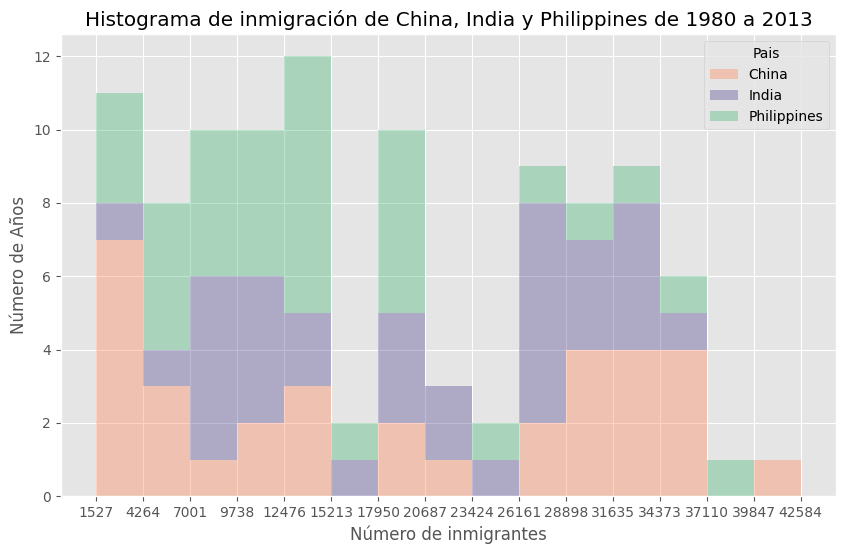

In [ ]:
# obtenemos los valores
conteo_frec, rango_bin = np.histogram(df_cip, 15)

# graficamos (histograma)
df_cip.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=rango_bin,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True, # para que no se superpongan
         )

# agregamos título y etiquetas
plt.title('Histograma de inmigración de China, India y Philippines de 1980 a 2013')
plt.ylabel('Número de Años')
plt.xlabel('Número de inmigrantes')

plt.show()

## Gráficos de barras

Los gráficos de barras son ideales para datos categóricos y compararlos. Cada barra representa una categoría y su longitud es proporcional al valor que representa. Los gráficos de barras se pueden utilizar en orientación vertical u horizontal.
Este tipo de gráficos suelen representar variables numéricas y categóricas agrupadas en intervalos.

*   `kind=bar` crea un diagrama de barras verticales
*   `kind=barh` crea un diagrama de barras horizontales

In [ ]:
# tomamos los datos que queremos graficar
df_denmark = df_can.loc['Denmark', fechas]
df_denmark.head()

1980    272
1981    293
1982    299
1983    106
1984     93
Name: Denmark, dtype: object

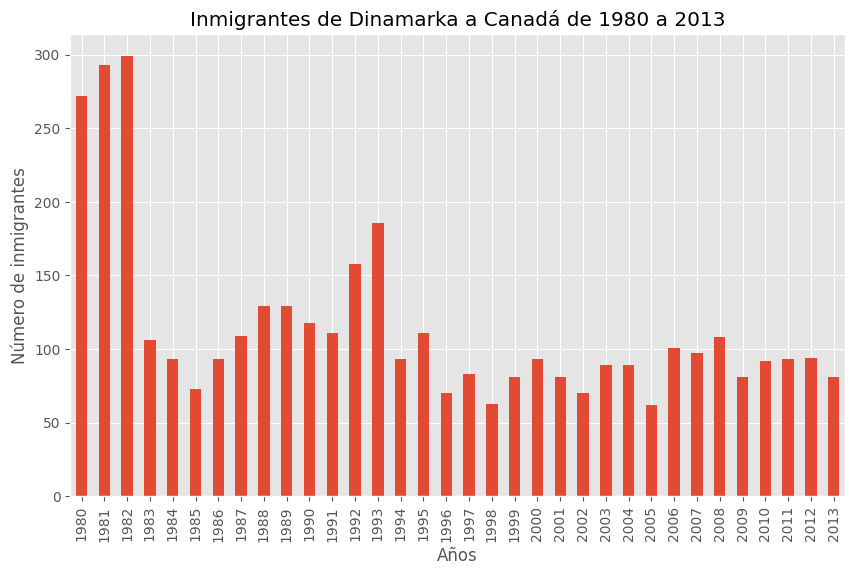

In [ ]:
# trazamos un gráfico de barras verticales
df_denmark.plot(kind='bar', figsize=(10, 6))

# agregamos títulos y etiquetas
plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes de Dinamarka a Canadá de 1980 a 2013')

# mostramos el gráfico
plt.show()

In [ ]:
# trazamos un gráfico de barras horizontal
# que muestre el número total de inmigrantes a Canadá desde los 15 países principales, para el período 1980 - 2013

# ordenamos el df por la columan total de forma ascendente
df_can.sort_values(by='Total', ascending=True, inplace=True)

# obtenemos el df para graficar con los 15 países principales
df_top15 = df_can['Total'].tail(15)
df_top15

Pais
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

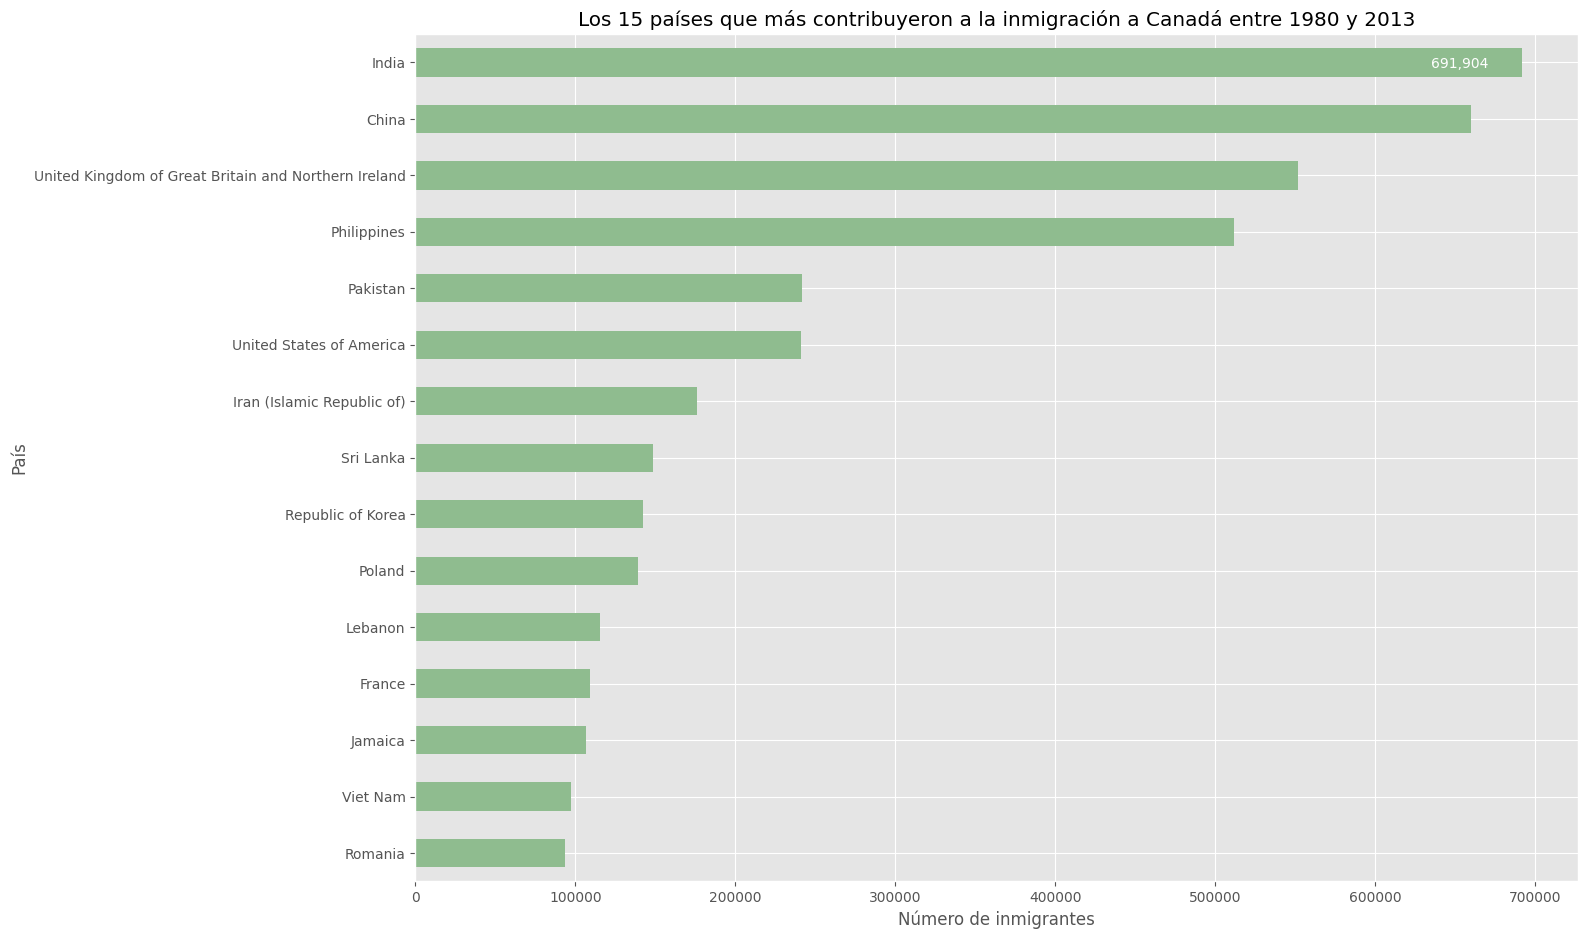

In [ ]:
# graficamos
df_top15.plot(kind='barh', figsize=(15, 11), color='darkseagreen')

# agregamos títulos y etiquetas
plt.xlabel('Número de inmigrantes')
plt.ylabel('País')
plt.title('Los 15 países que más contribuyeron a la inmigración a Canadá entre 1980 y 2013')

# agregamos etiquetas de valor a cada país
for index, value in enumerate(df_top15):
    label = format(int(value), ',')

# texto al final de la barra
plt.annotate(label, xy=(value - 57000, index - 0.10), color='white')

plt.show()

## Gráficos circulares

Este tipo de gráfico es ideal para representar partes de un todo. Son adecuados para mostrar proporciones y distribuciones, pero deben utilizarse con precaución para evitar confusiones.

*   `kind=pie` crea un gráfico circular

Queremos explorar la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes durante todo el período de 1980 a 2013.

In [ ]:
# visualizamos nuestro df para ver su estado
df_can.head()

Continente           Region             DevName  1980  1981  \
Pais                                                                           
Palau               Oceania       Micronesia  Developing regions     0     0   
Western Sahara       Africa  Northern Africa  Developing regions     0     0   
Marshall Islands    Oceania       Micronesia  Developing regions     0     0   
New Caledonia       Oceania        Melanesia  Developing regions     0     0   
San Marino           Europe  Southern Europe   Developed regions     1     0   

                  1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Pais                                            ...                           
Palau                0     0     0     0     0  ...     0     0     1     0   
Western Sahara       0     0     0     0     0  ...     0     1     0     0   
Marshall Islands     0     0     0     0     0  ...     0     0     2     0   
New Caledonia        0     0     0     0     0  ...     0     0     0     1   
San Marino           0     0     0     0     1  ...     0     0     0     0   

                  2009  2010  2011  2012  2013  Total  
Pais                                                   
Palau                0     0     0     0     0      1  
Western Sahara       0     0     0     0     0      2  
Marshall Islands     0     0     0     0     0      2  
New Caledonia        0     0     0     0     2      5  
San Marino           0     1     0     0     0      5  

[5 rows x 38 columns]

In [ ]:
# primero agrupamos los países por continentes y aplicamos la función suma()
df_continentes = df_can.groupby('Continente', axis=0).sum()

print(type(df_can.groupby('Continente', axis=0)))

df_continentes.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-44-8dee61493234>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continentes = df_can.groupby('Continente', axis=0).sum()


1980   1981   1982   1983   1984   1985  \
Continente                                                                  
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989  ...    2005  \
Continente                                                   ...           
Africa                            3782   7494   7552   9894  ...   27523   
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Northern America                  7074   7705   6469   6790  ...    8394   

                                   2006    2007    2008    2009    2010  \
Continente                                                                
Africa                            29188   28284   29890   34534   40892   
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Northern America                   9613    9463   10190    8995    8142   

                                   2011    2012    2013    Total  
Continente                                                        
Africa                            35441   38083   38543   618948  
Asia                             146894  152218  155075  3317794  
Europe                            26778   29177   28691  1410947  
Latin America and the Caribbean   27856   27173   24950   765148  
Northern America                   7677    7892    8503   241142  

[5 rows x 35 columns]

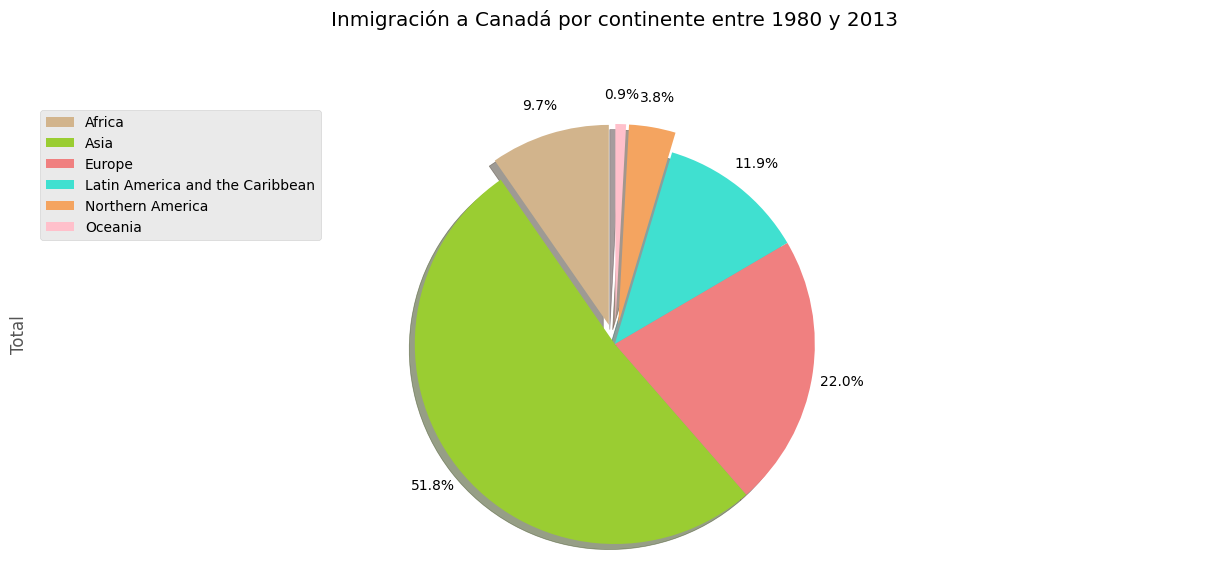

In [ ]:
# definimos los colores y el ratio que vamos a utilizar para el gráfico
lista_colores = ['tan', 'yellowgreen', 'lightcoral', 'turquoise', 'sandybrown', 'pink']
lista_ratio = [0.1, 0, 0, 0, 0.1, 0.1]

# luego trazamos el gráfico
df_continentes['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',   # formato del valor de las etiquetas
                            startangle=90,
                            shadow=True,
                            labels=None,         # desactivamos las etiquetas del gráfico
                            pctdistance=1.15,    # distancia entre el centro de cada sector circular y el inicio del texto
                            colors=lista_colores,  # los colores dela lista personalizada
                            explode=lista_ratio # "resaltar" los 3 continentes más bajos
                            )

# ampliamos el título en un 15 % e igualamos distancia
plt.title('Inmigración a Canadá por continente entre 1980 y 2013', y=1.15)

plt.axis('equal')

# agregamos una leyenda
plt.legend(labels=df_continentes.index, loc='upper left')

plt.show()

Podemos realizar otras exploraciones, como el porcentaje de nuevos inmigrantes agrupados por continentes en el año 2010.

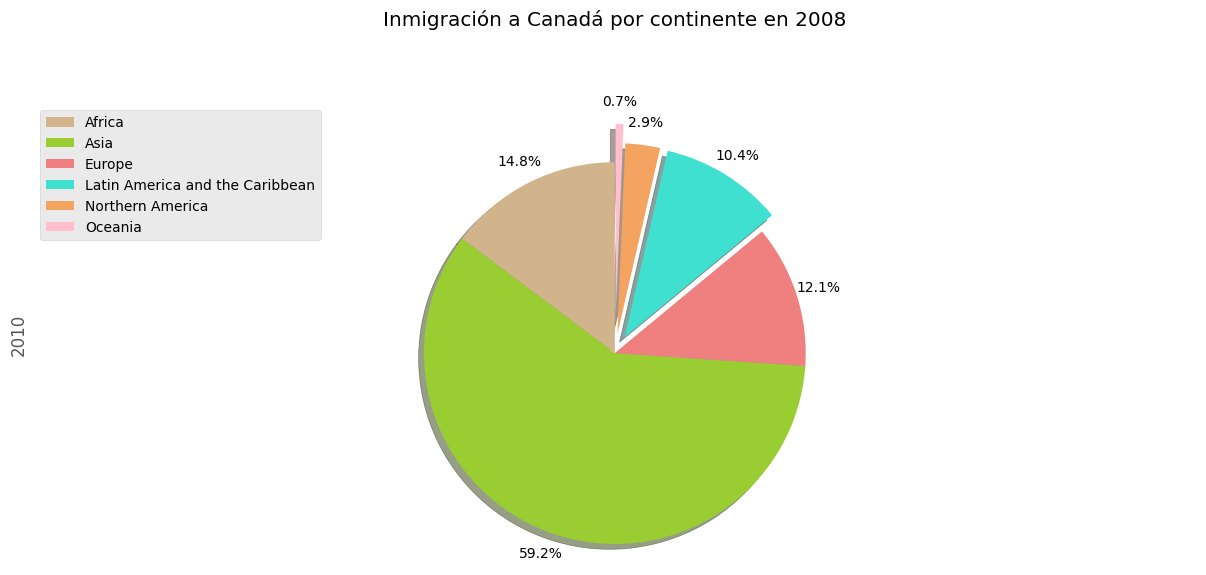

In [ ]:
# definimos otro ratio y troso colores
lista_ratio = [0.0, 0, 0, 0.1, 0.1, 0.2]
lista_colores = ['tan', 'yellowgreen', 'lightcoral', 'turquoise', 'sandybrown', 'pink']

# trazamos el gráfico
df_continentes['2010'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=lista_colores,
                            explode=lista_ratio
                            )

# ampliamos el título en un 15 % e igualamos distancia
plt.title('Inmigración a Canadá por continente en 2008', y=1.15)

plt.axis('equal')

# agregamos una leyenda
plt.legend(labels=df_continentes.index, loc='upper left')

plt.show()

## Gráficos de cajas

Ese tipo de gráfico es útil para visualizar la distribución y los valores atípicos de un conjunto de datos. Son ideales para comparar muúltiples distribuciones.

*   `kind=box` crea un gráfico de caja

- Mínimo: el número más pequeño del conjunto de datos, excluyendo los valores atípicos.
- Primer cuartil: número medio entre el mínimo y la mediana.
- Segundo cuartil (Mediana): número medio del conjunto de datos (ordenado).
- Tercer cuartil: Número medio entre la mediana y máximo.
- Máximo: el número más grande en el conjunto de datos, excluyendo los valores atípicos.

In [ ]:
# obtenemos el conjunto de datos, por ejemplo los relacionados a Japón
df_japon = df_can.loc[['Japan'], fechas].transpose()
df_japon.head()

Pais  Japan
1980    701
1981    756
1982    598
1983    309
1984    246

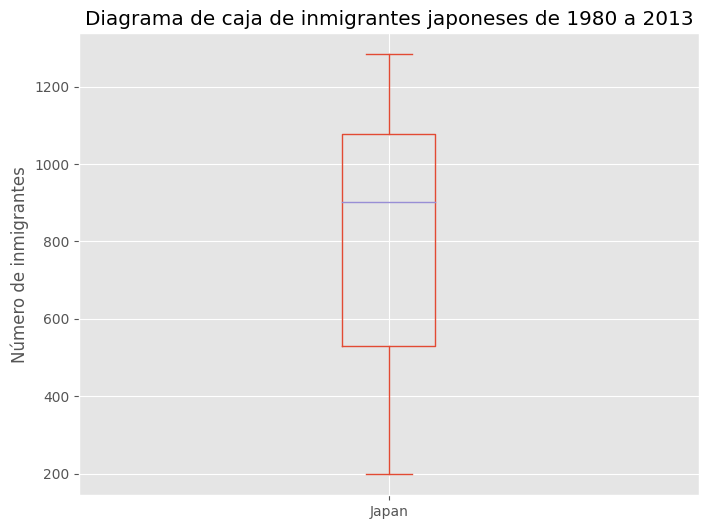

In [ ]:
# trazamos el grafico
df_japon.plot(kind='box', figsize=(8, 6))

plt.title('Diagrama de caja de inmigrantes japoneses de 1980 a 2013')
plt.ylabel('Número de inmigrantes')

plt.show()

A simple vista podemos decir que:
- El número mínimo de inmigrantes es de alrededor de 200, el número máximo es de alrededor de 1300 y el número medio de inmigrantes es de alrededor de 900 (mediana).
- El 25% de los años del período 1980 - 2013 tuvieron un recuento anual de inmigrantes de ~500 o menos (primer cuartil).
- El 75% de los años del período 1980 - 2013 tuvieron un recuento anual de inmigrantes de ~1100 o menos (tercer cuartil).

In [ ]:
# verificamos
df_japon.describe()

Pais         Japan
count    34.000000
mean    814.911765
std     337.219771
min     198.000000
25%     529.000000
50%     902.000000
75%    1079.000000
max    1284.000000

Comparemos ahora la distribución del número de nuevos inmigrantes de India y China para el período 1980 - 2013.

In [ ]:
# obtenemos el conjunto de datos China e India
df_CI= df_can.loc[['China', 'India'], fechas].transpose()
df_CI.head()

Pais  China  India
1980   5123   8880
1981   6682   8670
1982   3308   8147
1983   1863   7338
1984   1527   5704

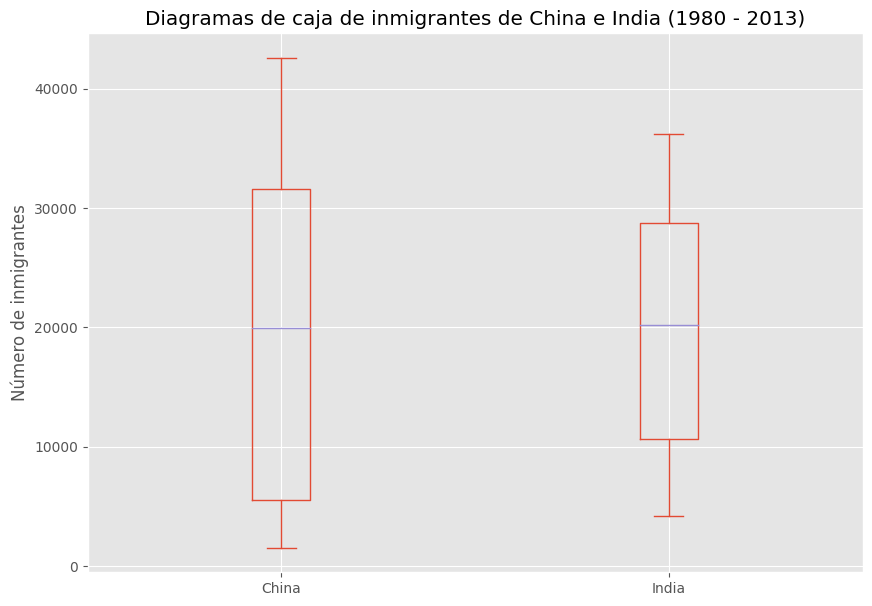

In [ ]:
# graficamos
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Diagramas de caja de inmigrantes de China e India (1980 - 2013)')
plt.ylabel('Número de inmigrantes')

plt.show()

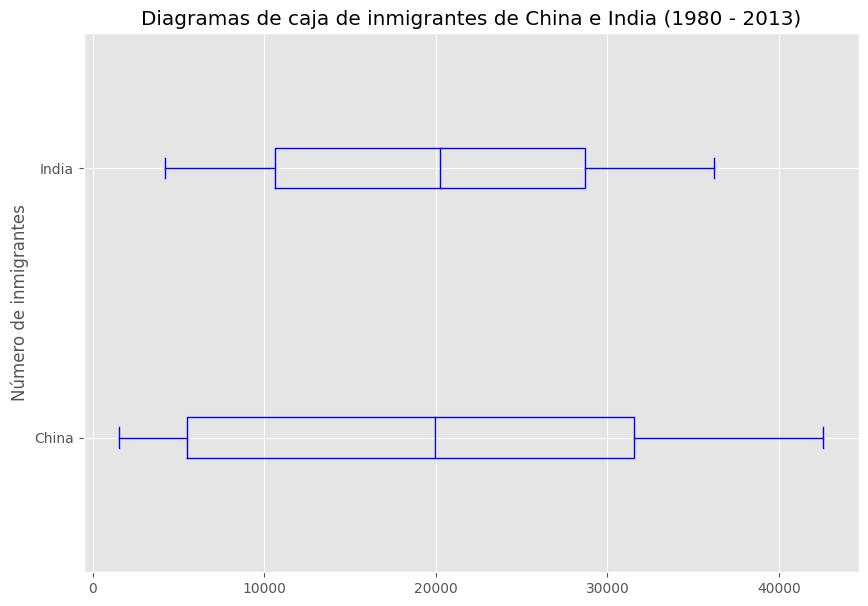

In [ ]:
# podemos graficarlo de forma horizontal también, pasando el parámetro vert en False
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Diagramas de caja de inmigrantes de China e India (1980 - 2013)')
plt.ylabel('Número de inmigrantes')

plt.show()

In [ ]:
# verificamos
df_CI.describe()

Pais          China         India
count     34.000000     34.000000
mean   19410.647059  20350.117647
std    13568.230790  10007.342579
min     1527.000000   4211.000000
25%     5512.750000  10637.750000
50%    19945.000000  20235.000000
75%    31568.500000  28699.500000
max    42584.000000  36210.000000

Ahora podemos observar que, si bien ambos países tienen aproximadamente la misma población de inmigrantes - media (~20.000), el rango de población inmigrante de China está más extendido que el de la India. La población máxima de la India es de (36.210) que es aproximadamente un 15% menor que la población máxima de China (42.584).

## Gráficos de dispersión

Se considera que los datos de un diagrama de dispersión expresan una tendencia. Es un método útil para comparar variables entre sí. Con un análisis más detallado que utilice herramientas como la regresión, podemos calcular matemáticamente esta relación y usarla para predecir tendencias fuera del conjunto de datos.

*   `kind=scatter` crea un gráfico de dipsersión

A continuación queremos visualizar la tendencia de la inmigración total a Canadá (todos los países combinados) para los años 1980 - 2013.

Utilizaremos para ello `scatter plot`

In [ ]:
# visualizamos nuestro df para ver su estado
df_can.head()

Continente           Region             DevName  1980  1981  \
Pais                                                                           
Palau               Oceania       Micronesia  Developing regions     0     0   
Western Sahara       Africa  Northern Africa  Developing regions     0     0   
Marshall Islands    Oceania       Micronesia  Developing regions     0     0   
New Caledonia       Oceania        Melanesia  Developing regions     0     0   
San Marino           Europe  Southern Europe   Developed regions     1     0   

                  1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Pais                                            ...                           
Palau                0     0     0     0     0  ...     0     0     1     0   
Western Sahara       0     0     0     0     0  ...     0     1     0     0   
Marshall Islands     0     0     0     0     0  ...     0     0     2     0   
New Caledonia        0     0     0     0     0  ...     0     0     0     1   
San Marino           0     0     0     0     1  ...     0     0     0     0   

                  2009  2010  2011  2012  2013  Total  
Pais                                                   
Palau                0     0     0     0     0      1  
Western Sahara       0     0     0     0     0      2  
Marshall Islands     0     0     0     0     0      2  
New Caledonia        0     0     0     0     2      5  
San Marino           0     1     0     0     0      5  

[5 rows x 38 columns]

In [ ]:
# obtenemos el conjunto de datos.
# como vamos a utilizar la relación entre fechas (años) y total de población, convertimos fechas (años) en tipo int.

# utilizamos sum() para obtener la población total por año
df_total = pd.DataFrame(df_can[fechas].sum(axis=0))

# cambiamos fechas (años) a tipo int
df_total.index = map(int, df_total.index)

# reestablecemos el índice para volver a colocarlo como columna en el df
df_total.reset_index(inplace = True)

# renombramos las columnas
df_total.columns = ['año', 'total']

# visualizamos como queda el df
df_total.head()

año   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

[ 5.56709228e+03 -1.09261952e+07]


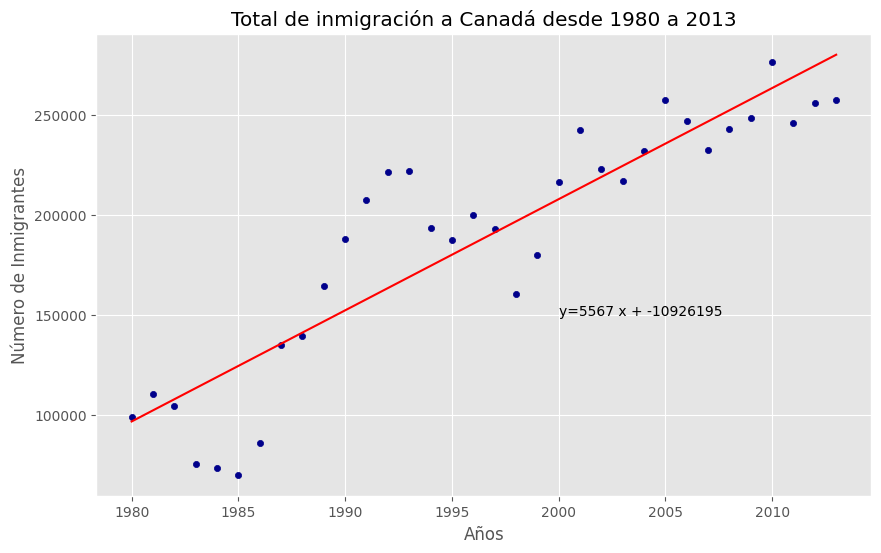

'No. Inmigrantes = 5567 * Año + -10926195'

In [ ]:
# graficamos agregando una línea de regresión para predecir el número de inmigrantes en 2015
# primero trazamos la línea de ajuste
x = df_total['año']
y = df_total['total']
fit = np.polyfit(x, y, deg=1)

print(fit)

# graficamos
df_total.plot(kind='scatter', x='año', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total de inmigración a Canadá desde 1980 a 2013')
plt.xlabel('Años')
plt.ylabel('Número de Inmigrantes')

# inlcuimos al gráfico la línea de mejor ajuste
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# imprimimos la línea de mejor ajuste
print("\n")
'No. Inmigrantes = {0:.0f} * Año + {1:.0f}'.format(fit[0], fit[1])

Utilizando la ecuación de la línea de mejor ajuste: y = a * x + b, podemos predecir que para el año 2015 Canadá aceptará alrededor de 291.310 inmigrantes.

-No. Inmigrantes = 5567 * Año + -10926195

-No. Inmigrantes = 5567 * 2015 -10926195

-No. Inmigrantes = 291.310

Resumen de pasos realizados:
1. Obtuvimos el conjunto de datos necesario para visualizar la tendencia de la inmigración total a Canadá.
2. Utilizamos sum() para obtener la población total por año.
3. Lo nombramos df_total
4. Cambiamos fechas (años) a tipo int, ya que vamos a utilizar la relación entre fechas (años) y total de población.
5. Rreestablecemos el índice para volver a colocarlo como columna en el df
6. Renombramos las columnas a año y total.
7. Visualizamos como queda el df
8. Graficamos


## Gráficos de burbujas

Este tipo de gráfico muestra tres dimensiones de datos (x, y, z). Los puntos de datos se reemplazan por burbujas y el tamaño de la burbuja está determinado por la tercera variable z (variable de peso)

Analizaremos el efecto de la crisis Argentina.

Argentina sufrió una gran crisis entre 1998 y 2002, que provocó un desempleo generalizado, disturbios, la caída del gobierno y un impago de la deuda externa del país. En términos de ingresos, más del 50% de los argentinos eran pobres, y siete de cada diez niños argentinos eran pobres en el peor momento de la crisis de 2002.

Analicemos el efecto de esta crisis y comparemos la inmigración de Argentina con la de su vecino Brasil. Hagámoslo usando un cálculo bubble plotde la inmigración de Brasil y Argentina para los años 1980 - 2013. Estableceremos las ponderaciones de la burbuja como el valor normalizado de la población para cada año.

In [ ]:
# visualizamos nuestro df para ver su estado
df_can.head()

Continente           Region             DevName  1980  1981  \
Pais                                                                           
Palau               Oceania       Micronesia  Developing regions     0     0   
Western Sahara       Africa  Northern Africa  Developing regions     0     0   
Marshall Islands    Oceania       Micronesia  Developing regions     0     0   
New Caledonia       Oceania        Melanesia  Developing regions     0     0   
San Marino           Europe  Southern Europe   Developed regions     1     0   

                  1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Pais                                            ...                           
Palau                0     0     0     0     0  ...     0     0     1     0   
Western Sahara       0     0     0     0     0  ...     0     1     0     0   
Marshall Islands     0     0     0     0     0  ...     0     0     2     0   
New Caledonia        0     0     0     0     0  ...     0     0     0     1   
San Marino           0     0     0     0     1  ...     0     0     0     0   

                  2009  2010  2011  2012  2013  Total  
Pais                                                   
Palau                0     0     0     0     0      1  
Western Sahara       0     0     0     0     0      2  
Marshall Islands     0     0     0     0     0      2  
New Caledonia        0     0     0     0     2      5  
San Marino           0     1     0     0     0      5  

[5 rows x 38 columns]

In [ ]:
# en primer lugar obtenemos los datos de Brasil y Argentina
# transponemos el df
df_can_t = df_can[fechas].transpose()

# ambiamos fechas (años) a tipo int
df_can_t.index = map(int, df_can_t.index)

# Etiquetemos el índice. Este será automáticamente el nombre de la columna cuando restablezcamos el índice.
df_can_t.index.name = 'Año'

# restablecer el índice para incluir el año como una columna
df_can_t.reset_index(inplace=True)

# visualizo el df para ver los cambios
df_can_t.head()

Pais   Año  Palau  Western Sahara  Marshall Islands  New Caledonia  \
0     1980      0               0                 0              0   
1     1981      0               0                 0              0   
2     1982      0               0                 0              0   
3     1983      0               0                 0              0   
4     1984      0               0                 0              0   

Pais  San Marino  American Samoa  Tuvalu  Sao Tome and Principe  Vanuatu  ...  \
0              1               0       0                      0        0  ...   
1              0               1       1                      0        0  ...   
2              0               0       0                      0        0  ...   
3              0               0       0                      0        0  ...   
4              0               0       1                      0        0  ...   

Pais  Poland  Republic of Korea  Sri Lanka  Iran (Islamic Republic of)  \
0        863               1011        185                        1172   
1       2930               1456        371                        1429   
2       5881               1572        290                        1822   
3       4546               1081        197                        1592   
4       3588                847       1086                        1977   

Pais  United States of America  Pakistan  Philippines  \
0                         9378       978         6051   
1                        10030       972         5921   
2                         9074      1201         5249   
3                         7100       900         4562   
4                         6661       668         3801   

Pais  United Kingdom of Great Britain and Northern Ireland  China  India  
0                                                 22045      5123   8880  
1                                                 24796      6682   8670  
2                                                 20620      3308   8147  
3                                                 10015      1863   7338  
4                                                 10170      1527   5704  

[5 rows x 196 columns]

In [ ]:
# a continuación normalizamos los datos de Brasil y Argentina
# brasil
norm_brasil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# argetina
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Para trazar dos diagramas de dispersión diferentes en un diagrama, podemos incluir los ejes de un diagrama en el otro pasándolo a través del parámetro ax.

También pasaremos los pesos usando el parámetro s.

Dado que los pesos normalizados están entre 0 y 1, no serán visibles en el gráfico. Por lo tanto, haremos lo siguiente:
- multiplicamos los pesos por 2000 para ampliarlos en el gráfico
- agregamos 10 para compensar el valor mínimo (que tiene un peso de 0 y, por lo tanto, escala con $\times 2000$).

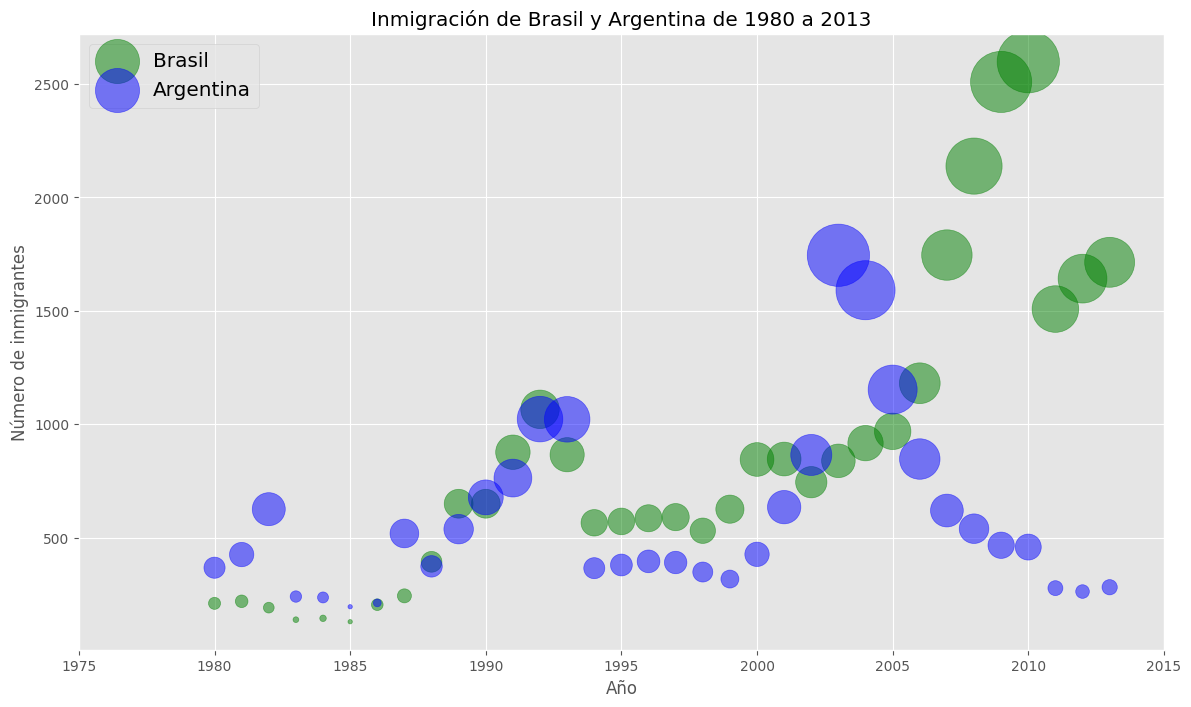

In [ ]:
# graficamos
# Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Año',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='green',
                    s=norm_brasil * 2000 + 10,
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Año',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Número de inmigrantes')
ax0.set_title('Inmigración de Brasil y Argentina de 1980 a 2013')
ax0.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')

El tamaño de la burbuja corresponde a la magnitud de la población inmigrante para ese año, en comparación con los datos de 1980 – 2013. Cuanto más grande es la burbuja, más inmigrantes habrá ese año.

En el gráfico anterior, podemos ver un aumento correspondiente en la inmigración desde Argentina durante la gran depresión de 1998 a 2002. También podemos observar un pico similar entre 1985 y 1993. De hecho, Argentina había sufrido una gran crisis entre 1974 y 1990, justo antes del inicio de la crisis de 1998 a 2002.

En una nota similar, Brasil sufrió el efecto Samba , donde el real brasileño (moneda) cayó casi un 35% en 1999. Existía el temor de una crisis financiera en América del Sur, ya que muchos países sudamericanos dependían en gran medida de las exportaciones industriales de Brasil. Posteriormente, el gobierno brasileño adoptó un programa de austeridad y la economía se recuperó lentamente a lo largo de los años, culminando con un aumento en 2010. Los datos de inmigración reflejan estos eventos.

Haremos algo similar con China e India para visualizar las diferencias de inmigración en el tiempo desde 1980 hasta 2013.
Utilizaremos el marcos  de datos df_can_t, del gráfico anterior-

In [ ]:
# visualizamos el df para su estado
df_can_t.head()

Pais   Año  Palau  Western Sahara  Marshall Islands  New Caledonia  \
0     1980      0               0                 0              0   
1     1981      0               0                 0              0   
2     1982      0               0                 0              0   
3     1983      0               0                 0              0   
4     1984      0               0                 0              0   

Pais  San Marino  American Samoa  Tuvalu  Sao Tome and Principe  Vanuatu  ...  \
0              1               0       0                      0        0  ...   
1              0               1       1                      0        0  ...   
2              0               0       0                      0        0  ...   
3              0               0       0                      0        0  ...   
4              0               0       1                      0        0  ...   

Pais  Poland  Republic of Korea  Sri Lanka  Iran (Islamic Republic of)  \
0        863               1011        185                        1172   
1       2930               1456        371                        1429   
2       5881               1572        290                        1822   
3       4546               1081        197                        1592   
4       3588                847       1086                        1977   

Pais  United States of America  Pakistan  Philippines  \
0                         9378       978         6051   
1                        10030       972         5921   
2                         9074      1201         5249   
3                         7100       900         4562   
4                         6661       668         3801   

Pais  United Kingdom of Great Britain and Northern Ireland  China  India  
0                                                 22045      5123   8880  
1                                                 24796      6682   8670  
2                                                 20620      3308   8147  
3                                                 10015      1863   7338  
4                                                 10170      1527   5704  

[5 rows x 196 columns]

In [ ]:
# normalizamos los datos de China
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalizamos los datos de India
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

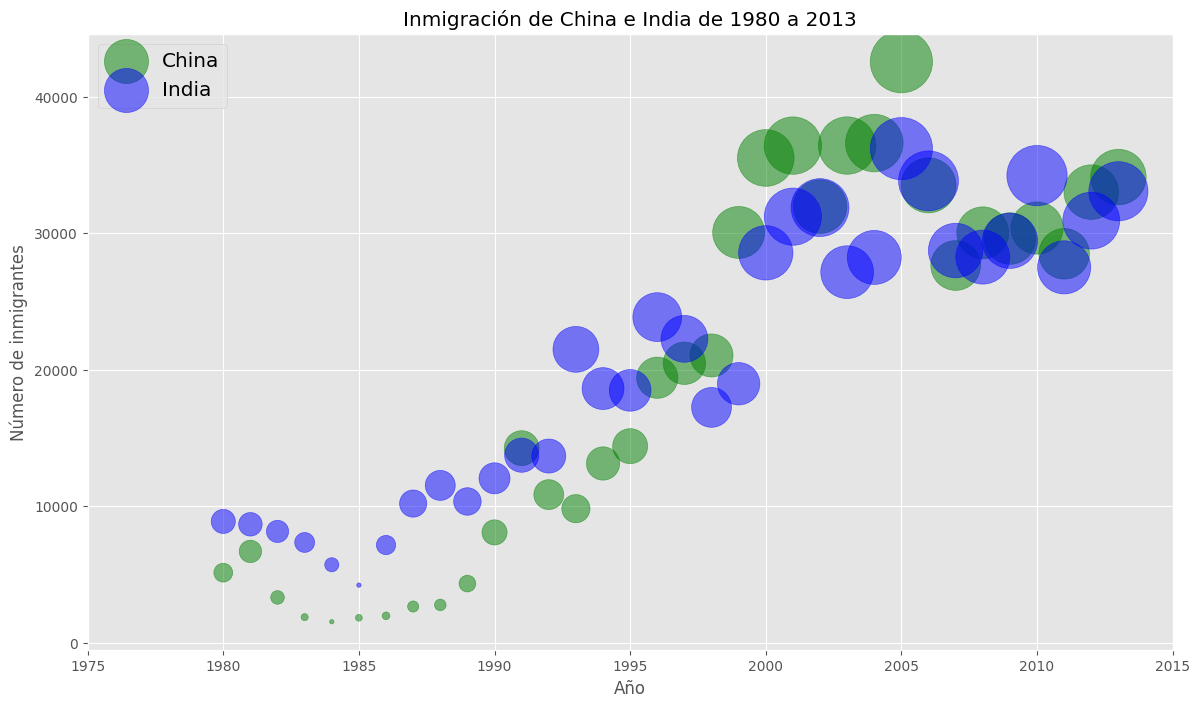

In [ ]:
# graficamos
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Año',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparencia
                    color='green',
                    s=norm_china * 2000 + 10,
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Año',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                    )

ax0.set_ylabel('Número de inmigrantes')
ax0.set_title('Inmigración de China e India de 1980 a 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

## Gráficos de gofres

Este tipo de gráfico normalmente se utiliza para mostrar el progreso hacia metas.

Suele ser una opción eficaz cuando se intenta agregar funciones de visualización interesantes a un objeto visual que consta principalmente de celdas, como un panel de Excel, (mosaicos).

A continuación vamos a revisar el caso de inmigración sobre Dinamarca, Noruega y Suecia.

In [ ]:
# visualizamos nuestro df para ver su estado
df_can.head()

Continente           Region             DevName  1980  1981  \
Pais                                                                           
Palau               Oceania       Micronesia  Developing regions     0     0   
Western Sahara       Africa  Northern Africa  Developing regions     0     0   
Marshall Islands    Oceania       Micronesia  Developing regions     0     0   
New Caledonia       Oceania        Melanesia  Developing regions     0     0   
San Marino           Europe  Southern Europe   Developed regions     1     0   

                  1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Pais                                            ...                           
Palau                0     0     0     0     0  ...     0     0     1     0   
Western Sahara       0     0     0     0     0  ...     0     1     0     0   
Marshall Islands     0     0     0     0     0  ...     0     0     2     0   
New Caledonia        0     0     0     0     0  ...     0     0     0     1   
San Marino           0     0     0     0     1  ...     0     0     0     0   

                  2009  2010  2011  2012  2013  Total  
Pais                                                   
Palau                0     0     0     0     0      1  
Western Sahara       0     0     0     0     0      2  
Marshall Islands     0     0     0     0     0      2  
New Caledonia        0     0     0     0     2      5  
San Marino           0     1     0     0     0      5  

[5 rows x 38 columns]

In [ ]:
# creamos un nuevo df para estos tres países
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# visualizamos el nuevo df
df_dsn

Continente           Region            DevName  1980  1981  1982  \
Pais                                                                       
Denmark     Europe  Northern Europe  Developed regions   272   293   299   
Norway      Europe  Northern Europe  Developed regions   116    77   106   
Sweden      Europe  Northern Europe  Developed regions   281   308   222   

         1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Pais                             ...                                       
Denmark   106    93    73    93  ...    62   101    97   108    81    92   
Norway     51    31    54    56  ...    57    53    73    66    75    46   
Sweden    176   128   158   187  ...   205   139   193   165   167   159   

         2011  2012  2013  Total  
Pais                              
Denmark    93    94    81   3901  
Norway     49    53    59   2327  
Sweden    134   140   140   5866  

[3 rows x 38 columns]

Como este tipo de gráficos no están integrados en ninguna de las bibliotecas de visualización de Python, tendremos que crearlos desde cero.

Resumen de pasos:
1. Determinar la proporción de cada categoría con respecto al total.
2. Definir el tamaño total del gráfico de waffle (gofre).
3. Usar la proporción de cada categoría para determinar su número respectivo de mosaicos.
4. Crear una matriz que se parezca al gráfico de waffle y completarla.
5. Asignar la matriz waffle del gráfico a un objeto visual.
6. Darle formato al gráfico

In [ ]:
# calculamos la proporción de cada categoría con respecto al total
valores_totales = df_dsn['Total'].sum()
proporciones_categoria = df_dsn['Total'] / valores_totales

# visualizamos proporciones
pd.DataFrame({"Proporción de categoría": proporciones_categoria})

Proporción de categoría
Pais                            
Denmark                 0.322557
Norway                  0.192409
Sweden                  0.485034

In [ ]:
# definimos el tamaño total del gráfico de waffle
ancho = 40 # ancho del gráfico
alto = 10 # altura del gráfico

# número total de mosaicos
num_mosaic = ancho * alto

print(f'El número total de mosaicos es {num_mosaic}.')

El número total de mosaicos es 400.


In [ ]:
# calculamos el número de mosaicos para cada categoría
mosaicos_por_categoría = (proporciones_categoria * num_mosaic).round().astype(int)

# número de mosaicos por categoría
pd.DataFrame({"Número de mosaicos": mosaicos_por_categoría})

Número de mosaicos
Pais                       
Denmark                 129
Norway                   77
Sweden                  194

In [ ]:
# creamos una matriz que se parezca al gráfico de waffle y la completamos
grafico_waffle = np.zeros((alto, ancho), dtype = np.uint)

# definimos índices para recorrer el gráfico
category_index = 0
tile_index = 0

# rellenamos el gráfico
for col in range(ancho):
    for row in range(alto):
        tile_index += 1

        # si el número de mosaicos poblados para la categoría actual es igual a sus mosaicos asignados correspondientes...
        if tile_index > sum(mosaicos_por_categoría[0:category_index]):
            # ...pasar a la siguiente categoría
            category_index += 1

        # establezca el valor de la clase en un número entero, que aumenta con la clase
        grafico_waffle[row, col] = category_index

print ('Gráfico de Waffle completo!')

Gráfico de Waffle completo!


In [ ]:
# visualizamos la matríz
grafico_waffle

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

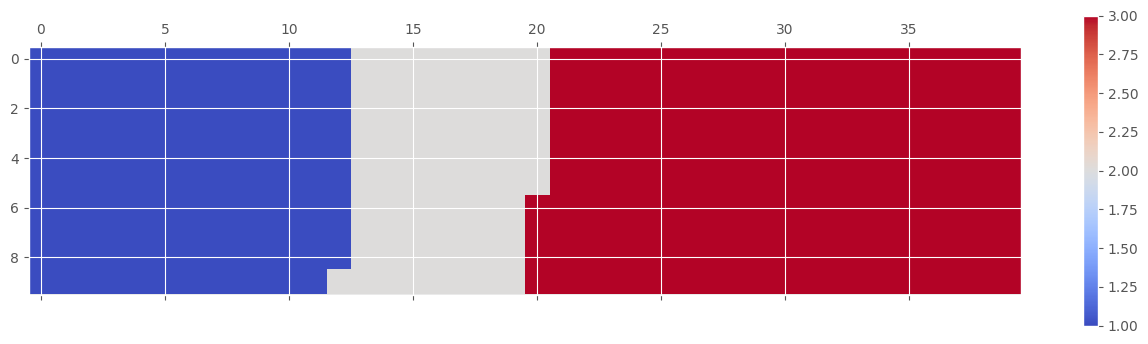

In [ ]:
# graficamos
# crear una instancia de un nuevo objeto de figura
fig = plt.figure()

# ustilizamos matshow para mostrar el gráfico
colormap = plt.cm.coolwarm
plt.matshow(grafico_waffle, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

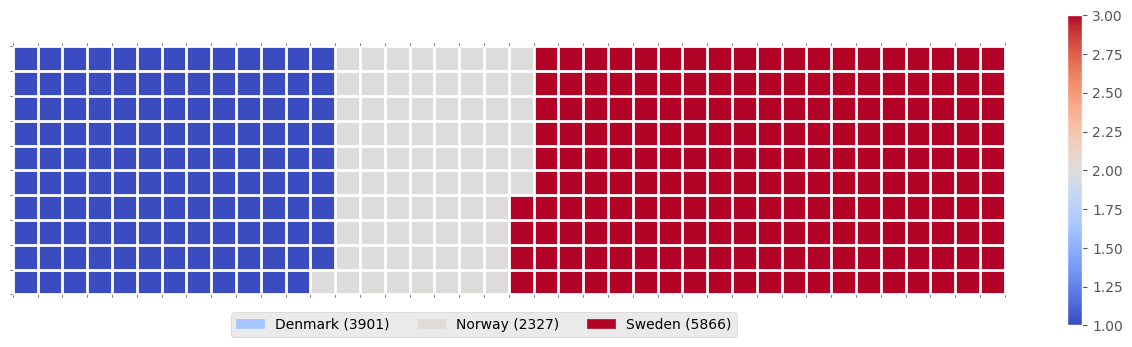

In [ ]:
# le damos un poco de formato al gráfico
# crear una instancia de un nuevo objeto de figura
fig = plt.figure()

# ustilizamos matshow para mostrar el gráfico
colormap = plt.cm.coolwarm
plt.matshow(grafico_waffle, cmap=colormap)
plt.colorbar()

# eje
ax = plt.gca()

# divisiones
ax.set_xticks(np.arange(-.5, (ancho), 1), minor=True)
ax.set_yticks(np.arange(-.5, (alto), 1), minor=True)

# agregamos líneas de cuadrícula basadas en las divisiones
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# calculamos la suma acumulada de categorías individuales para hacer coincidir los colores entre el gráfico y la leyenda
valores_acum = np.cumsum(df_dsn['Total'])
valores_totales = valores_acum[len(valores_acum) - 1]

# creamos la leyenda
leyendas = []
for i, category in enumerate(df_dsn.index.values):
    etiqueta = category + ' (' + str(df_dsn['Total'][i]) + ')'
    colores = colormap(float(valores_acum[i])/valores_totales)
    leyendas.append(mpatches.Patch(color=colores, label=etiqueta))

# agregamos leyenda al gráfico
plt.legend(handles=leyendas,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

## Nubes de palabras

Las nubes se utilizan comúnmente para realizar análisis y visualización de alto nivel de datos de texto.

In [ ]:
# instalar wordcloud
!pip install wordcloud

# importar el paquete
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud se ha instalado e importado!')

Wordcloud se ha instalado e importado!


Para esta ocasión analizaremos un cuento del escritor y aviador francés Antoine de Saint-Exupéry, titulado El Principito. Como primer paso descargar el archivo .txt del cuento.

In [ ]:
# importamos la librería si fuera necesario para abrir un archivo en una direción url
import urllib

el_principito = open('/content/drive/MyDrive/Colab Notebooks/Visualizacion de datos con Python/principito.txt').read()

A continuación, usemos las palabras vacías que importamos de word_cloud. Usamos el conjunto de funciones para eliminar cualquier palabra irrelevante redundante.

In [ ]:
stopwords = set(STOPWORDS)

Crear un objeto de nube de palabras y generar una nube de palabras. Para simplificar, generar una nube de palabras usando solo las primeras 2000 palabras del cuento.

In [ ]:
# crear una instancia de un objeto de nube de palabras
principito_wc = WordCloud(
     background_color='white',
     max_words=2000,
     stopwords=stopwords
 )

# generar la nube de palabras
principito_wc.generate(el_principito)

Una vez que está creada el siguiente paso es visualizarla.

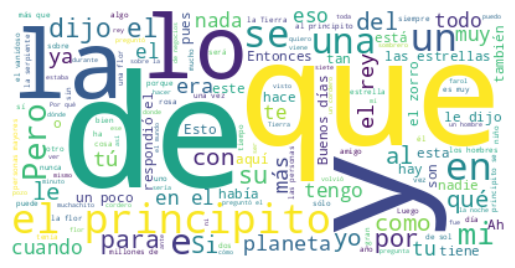

In [ ]:
# visualizar la nube de palabras
plt.imshow(principito_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

En las primeras 2000 palabras del cuento, las palabras más comunes son lo , que, de, la, y, etc. Cambiar el tamaño de la nube para que podamos ver un poco mejor las palabras menos frecuentes.

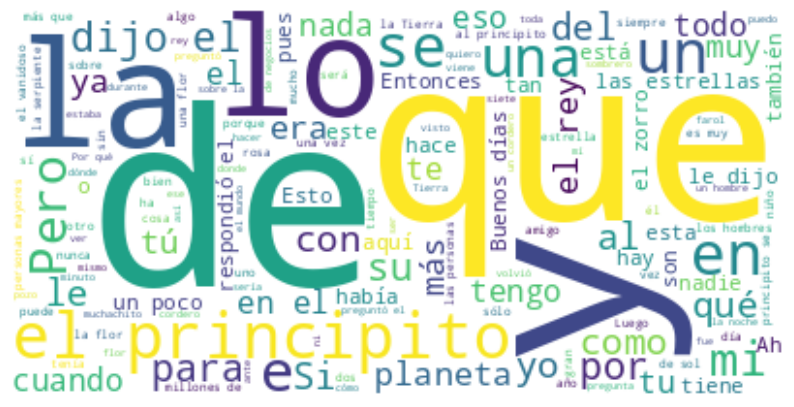

In [ ]:
fig = plt.figure(figsize=(10, 12))

# visualizar la nube de palabras
plt.imshow(principito_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Como las palabras, que, la, y, de,lo y un, etc, no son palabras informativas, las agregamos a nuestras palabras vacías y volvemos a generar la nube. Aprovechamos y cambiamos el color y ampliamos el máximo de palabras

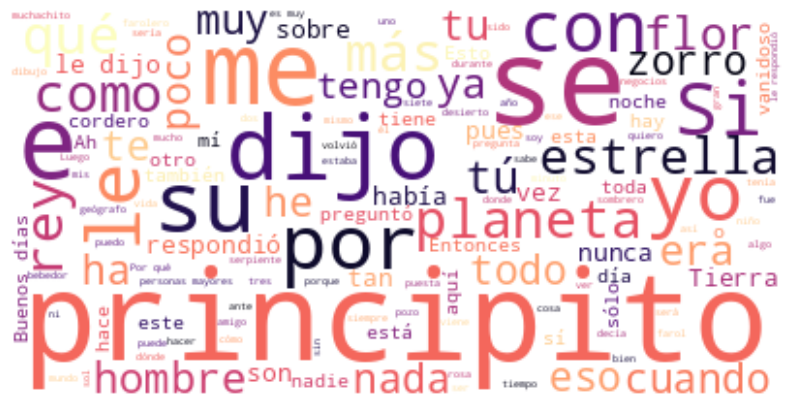

In [ ]:
principito_wc = WordCloud(
     background_color='white',
     max_words=3000,
     stopwords=["y", "de", "lo", "la", "que", "un", "una", "no", "a", "las", "lo", "en", "los", "en", "al", "el", "del", "mi", "para", "pero"],
     colormap = "magma")

# regenerar la nube de palabras
principito_wc.generate(el_principito)

# visualizar la nube
fig = plt.figure(figsize=(10, 12))

plt.imshow(principito_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Podemos darle forma a nuestra nube de palabras utlizando una máscara, por ejemplo para este caso forma de círculo

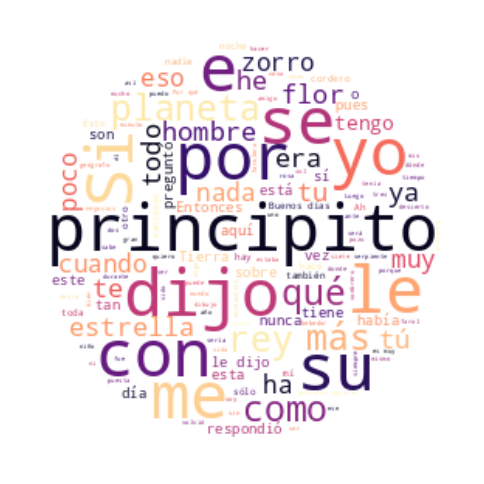

In [ ]:
# crear la máscara cículo
x, y = np.ogrid[:300, :300]
circulo = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
circulo = 255 * circulo.astype(int)

# crear una instancia de un objeto de nube de palabras y le damos formato
principito_wc = WordCloud(
     background_color='white',
     max_words=3000,
     stopwords=["y", "de", "lo", "la", "que", "un", "una", "no", "a", "las", "lo", "en", "los", "en", "al", "el", "del", "mi", "para", "pero"],
     colormap = "magma",
     repeat = True,
     mask = circulo)

# regenerar la nube de palabras
principito_wc.generate(el_principito)

# visualizar la nube
fig = plt.figure(figsize=(6, 8))

plt.imshow(principito_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("principito.png")
plt.show()

También podemos utilizar una imagen como mácara para dar forma a nuestra nube de palabras

In [ ]:
# tomar una imagen y guardar máscara como principito_mask
from PIL import Image
principito_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/Visualizacion de datos con Python/principito.png'))

print('Imagen descargada y guardada!')

Imagen descargada y guardada!


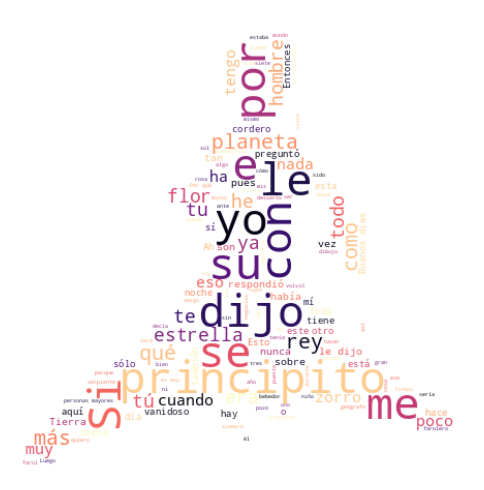

In [ ]:
# crear una instancia de un objeto de nube de palabras y le damos formato
principito_wc = WordCloud(
     background_color='white',
     max_words= 1000,
     stopwords=["y", "de", "lo", "la", "que", "un", "una", "no", "a", "las", "lo", "en", "los", "en", "al", "el", "del", "mi", "para", "pero"],
     colormap = "magma",
     repeat = True,
     mask = principito_mask)

# regenerar la nube de palabras
principito_wc.generate(el_principito)

# visualizar la nube
fig = plt.figure(figsize=(6, 8))

plt.imshow(principito_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("principito.png")
plt.show()

## Gráficos de regresión

Seaborn es una biblioteca de visualización de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos. Exploraremos seaborn y veremos cuán eficiente es crear líneas de regresión y ajustes usando esta biblioteca.

In [ ]:
# instalar seaborn
!pip3 install seaborn

# importar la librería
import seaborn as sns

print('Seaborn instalada e importada!')

Seaborn instalada e importada!


Para en este caso retomaremos el dataframe de Canadá para crear un nuevo marco de datos que almacene el número total de inmigrantes que llegaron a Canadá por año desde 1980 hasta 2013.

In [ ]:
# utilizar el método sum() para obtener la población total por año
df_total = pd.DataFrame(df_can[fechas].sum(axis=0))

# cambiar los años a float (útil para la regresión más adelante)
df_total.index = map(float, df_total.index)

# restablecer el índice para volver a colocarlo como una columna en el marco de datos df_total
df_total.reset_index(inplace=True)

# renombrar las columnas
df_total.columns = ['año', 'total']

# visualizar como queda el df final
df_total.head()

año   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

Generar el gráfico de regresión con Seaborn llamando a la función regplot.

<Axes: xlabel='año', ylabel='total'>

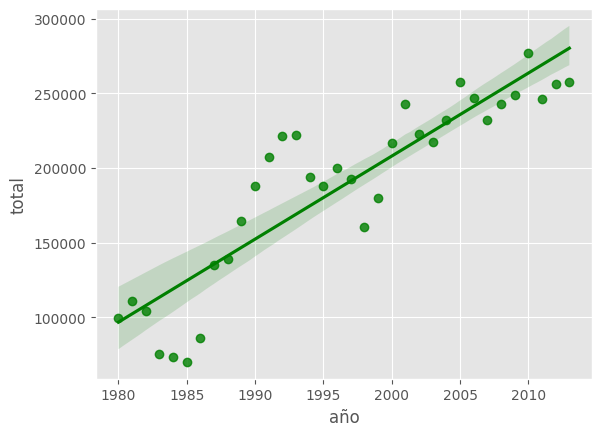

In [ ]:
sns.regplot(x='año', y='total', data=df_total, color='green')

Damos un poco mas de formato al gráfico

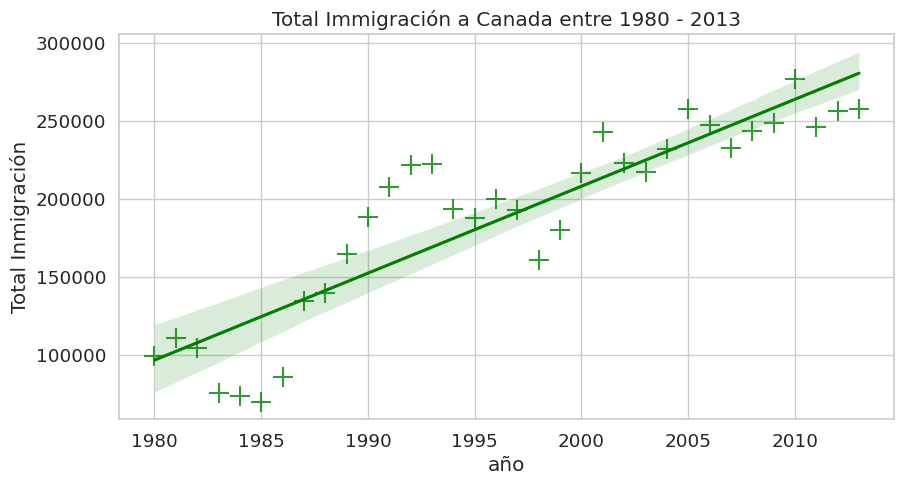

In [ ]:
# tamaño del gráfico
plt.figure(figsize=(10, 5))

# tamaño de fuente de las etiquetas de las marcas de verificación, el título y las etiquetas x e y
sns.set(font_scale=1.2)

# cambiar el fondo a fondo con cuadrículas
sns.set_style('whitegrid')

# graficar
ax = sns.regplot(x='año', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

# agregar etiquetas x e y
ax.set(xlabel='año', ylabel='Total Inmigración')

# # agregar título
ax.set_title('Total Immigración a Canada entre 1980 - 2013')

# mostrar gráfico
plt.show()

## Gráficos geoespaciales

Utilizaremos para este tipo de gráficos la biblioteca Folium.  Esta fue desarrollada con el único propósito de visualizar datos geoespaciales y el hecho de que los resultados de Folium sean interactivos hace que esta biblioteca sea muy útil para la creación de paneles.

Folium no está disponible de forma predeterminada. Por lo tanto, primero debemos instalarlo antes de poder importarlo.

In [ ]:
#!pip3 install folium==0.5.0
import folium

print('Folium instalado e importado!')

Folium instalado e importado!


In [ ]:
# definimos un mapa mundial
mapa_mundo = folium.Map()

# mostrar mapa
mapa_mundo

Creamos un mapa centrado en Uruguay e implementamos niveles de zoom para ver cómo afecta el mapa renderizado.

In [ ]:
# definir el mapa mundial centrado alrededor de Uruguay con un nivel de zoom adecuado

# definir las coordenadas de Uruguay
uruguay_latitude = -32.522779
uruguay_longitude = -55.765835

# definir el mapa mundial centrado alrededor de Uruguay con un nivel de zoom adecuado
mapa_uruguay = folium.Map(location=[uruguay_latitude, uruguay_longitude], zoom_start=7)

# mostrar mapa
mapa_uruguay

Con Folium se pueden crear mapas con diferentes características. Probemos algunos

In [ ]:
# Mapas en blanco y negro (Stamen Toner Maps). Son perfectos para combinar datos y explorar meandros de ríos y zonas costeras.

# definir el mapa de Uruguay con un nivel de zoom adecuado y el estilo
mapa_uruguay = folium.Map(location=[uruguay_latitude, uruguay_longitude], zoom_start=7, tiles='Stamen Toner')

# mostrar mapa
mapa_uruguay

In [ ]:
# Mapas de terreno. Son mapas que presentan sombras de colinas y colores de vegetación natural.
# Muestran etiquetado avanzado y generalización de líneas de carreteras de doble calzada.

# definir el mapa de Uruguay con un nivel de zoom adecuado y el estilo
mapa_uruguay = folium.Map(location=[uruguay_latitude, uruguay_longitude], zoom_start=7, tiles='Stamen Terrain') # cartodb positron # OpenStreetMap

# mostrar mapa
mapa_uruguay

In [ ]:
# mapa de rutas

# definir el mapa de Uruguay con un nivel de zoom adecuado y el estilo
mapa_uruguay = folium.Map(location=[uruguay_latitude, uruguay_longitude], zoom_start=7, tiles='OpenStreetMap')

# mostrar mapa
mapa_uruguay

In [ ]:
# definir el mapa de Uruguay con un nivel de zoom adecuado y el estilo
mapa_uruguay = folium.Map(location=[uruguay_latitude, uruguay_longitude], zoom_start=7, tiles='cartodb positron')

# mostrar mapa
mapa_uruguay

**Mapas Coropléticos (mapas temáticos)**

Este tipo de mapas proporciona una manera fácil de visualizar cómo varía una medición en un área geográfica o muestra el nivel de variabilidad dentro de una región.

Crearemos un mapa Choropleth de Uruguay que represente la cantidad de población por departamento.

In [ ]:
# Crear un mapa de Folium centrado en Uruguay
uruguay = folium.Map(location=[-32.800085, -56.026504], zoom_start=7)

# Datos de población por departamento en Uruguay
data = {
    'Departamento': ['Artigas', 'Canelones', 'Cerro Largo', 'Colonia', 'Durazno', 'Flores', 'Florida', 'Lavalleja', 'Maldonado', 'Montevideo', 'Paysandú', 'Río Negro', 'Rivera', 'Rocha', 'Salto', 'San José', 'Soriano', 'Tacuarembó', 'Treinta y Tres'],
    'Poblacion': [73377, 520173, 84698, 123203, 57084, 25050, 67047, 58815, 164298, 1318755, 113107, 54765, 103473, 68088, 124861, 108304, 82594, 90051, 48134]
}

# Crear un DataFrame de Pandas a partir de los datos
datos = pd.DataFrame(data)

# crear la escala de colores
escala = np.linspace(datos['Poblacion'].min(),
                     datos['Poblacion'].max(),
                     16, dtype=int)

# cambiar la matriz a una lista
escala = escala.tolist()

# Agregar el Choropleth al mapa
folium.Choropleth(
    geo_data='/content/drive/MyDrive/Colab Notebooks/Visualizacion de datos con Python/uruguay.geojson',  # Archivo GeoJSON de los departamentos
    name='choropleth',
    data=datos,
    columns=['Departamento', 'Poblacion'],
    key_on='feature.properties.NAME_1',
    threshold_scale=escala,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Población por Departamento en Uruguay'
).add_to(uruguay)

# visualizar mapa
uruguay


Algunos detalles de los parámetros:
1. **geo_data**: es el archivo GeoJSON.
2. **data**: es el marco de datos que contiene los datos.
3. **columns**: representa las columnas del marco de datos que se utilizarán para crear el Choroplethmapa.
4. **key_on**: es la clave o variable en el archivo GeoJSON que contiene el nombre de la variable de interés.
Para determinar eso, se deberá abrir el archivo GeoJSON usando cualquier editor de texto y anotar el nombre de la clave o variable que contiene el nombre de los departamentos, ya que los departamentos son nuestra variable de interés.
5. **threshold_scale**: escala.

**Mapas con Marcadores**

Para este tipo de mapas utilizaremos la siguiente información:


El Departamento de Policía de Gainesville (GPD) proporciona Crime Responses para documentar los detalles iniciales sobre un incidente al que responden los agentes de GPD.
Este conjunto de datos contiene incidentes delictivos desde 2011 hasta el presente e incluye un conjunto reducido de campos centrados en capturar el tipo de incidente, así como cuándo y dónde ocurrió.

Ref: https://data.cityofgainesville.org/Public-Safety/Crime-Responses/gvua-xt9q

In [ ]:
# descarga y lectura de los datos
df_incidentes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Visualizacion de datos con Python/Crime_Responses_20231016.csv')

print('Datos descargados y leídos con éxito!')

Datos descargados y leídos con éxito!


In [ ]:
df_incidentes.head()

ID                    Incident Type             Report Date  \
0  223002872  Criminal Mischief (misdemeanor)  02/23/2023 09:17:00 AM   
1  223002991                   Sexual Battery  02/25/2023 04:30:45 AM   
2  223002928                        Baker Act  02/24/2023 02:41:00 AM   
3  223002742                 Battery (simple)  02/21/2023 05:48:58 AM   
4  223002904          Threatening Phone Calls  02/23/2023 04:46:56 PM   

             Offense Date  Report Hour of Day Report Day of Week  \
0  02/23/2023 06:40:59 AM                   9           Thursday   
1  02/25/2023 12:45:44 AM                   4           Saturday   
2  02/24/2023 02:41:00 AM                   2             Friday   
3  02/21/2023 03:00:00 AM                   5            Tuesday   
4  02/23/2023 03:30:00 PM                  16           Thursday   

   Offense Hour of Day Offense Day of Week         City State  \
0                    6            Thursday  GAINESVILLE    FL   
1                    0            Saturday  GAINESVILLE    FL   
2                    2              Friday  GAINESVILLE    FL   
3                    3             Tuesday  GAINESVILLE    FL   
4                   15            Thursday  GAINESVILLE    FL   

                     Address  Latitude  Longitude                    Location  
0  1300 BLK W UNIVERSITY AVE  29.65207  -82.33988  POINT (-82.33988 29.65207)  
1      1300 BLK SW 51ST BLVD  29.64136  -82.39650   POINT (-82.3965 29.64136)  
2         900 BLK SW 13TH ST  29.64354  -82.33939  POINT (-82.33939 29.64354)  
3       3700 BLK SW 28TH TER  29.61683  -82.36537  POINT (-82.36537 29.61683)  
4         500 BLK NW 8TH AVE  29.65941  -82.33035  POINT (-82.33035 29.65941)

Visualicemos cuántas entradas hay en el conjunto de datos.

In [ ]:
df_incidentes.shape

(201652, 14)

Para este caso vamos a reducir un poco los datos para trabajar mejor

In [ ]:
# obtener los primeros 100 delitos del df, para reducir un poco los datos
limit = 100
df_incidentes = df_incidentes.iloc[0:limit, :]

In [ ]:
df_incidentes.shape

(100, 14)

In [ ]:
# cambiamos el nombre de la columna Incident Type
df_incidentes.rename(columns={'Incident Type':'Tipo'}, inplace=True)
df_incidentes.head(15)

ID                                             Tipo  \
0   223002872                  Criminal Mischief (misdemeanor)   
1   223002991                                   Sexual Battery   
2   223002928                                        Baker Act   
3   223002742                                 Battery (simple)   
4   223002904                          Threatening Phone Calls   
5   223003058                         City Ordinance Violation   
6   223002946                                 Battery (felony)   
7   223002752                           Burglary to Conveyance   
8   223002957                       Criminal Mischief (felony)   
9   223003126                                          Runaway   
10  223002765                              Theft Petit - Other   
11  223002853                                 Battery (felony)   
12  223002997  Fraud (obtain Money/property by False Pretense)   
13  223003018                          Domestic Simple Battery   
14  223003062                             Theft Petit - Retail   

               Report Date            Offense Date  Report Hour of Day  \
0   02/23/2023 09:17:00 AM  02/23/2023 06:40:59 AM                   9   
1   02/25/2023 04:30:45 AM  02/25/2023 12:45:44 AM                   4   
2   02/24/2023 02:41:00 AM  02/24/2023 02:41:00 AM                   2   
3   02/21/2023 05:48:58 AM  02/21/2023 03:00:00 AM                   5   
4   02/23/2023 04:46:56 PM  02/23/2023 03:30:00 PM                  16   
5   02/26/2023 04:36:00 PM  02/26/2023 04:36:00 PM                  16   
6   02/24/2023 12:00:00 PM  02/24/2023 11:42:18 AM                  12   
7   02/21/2023 12:37:20 PM  02/20/2023 08:30:00 PM                  12   
8   02/26/2023 09:33:14 AM  02/24/2023 07:00:00 AM                   9   
9   02/27/2023 06:49:16 PM  02/27/2023 03:00:15 PM                  18   
10  02/21/2023 01:55:41 PM  02/17/2023 12:00:00 AM                  13   
11  02/22/2023 11:25:26 PM  02/22/2023 08:40:25 PM                  23   
12  02/25/2023 09:00:21 AM  02/24/2023 07:15:00 AM                   9   
13  02/25/2023 06:59:00 PM  02/25/2023 06:44:00 PM                  18   
14  02/26/2023 06:54:50 PM  02/25/2023 10:50:00 AM                  18   

   Report Day of Week  Offense Hour of Day Offense Day of Week         City  \
0            Thursday                    6            Thursday  GAINESVILLE   
1            Saturday                    0            Saturday  GAINESVILLE   
2              Friday                    2              Friday  GAINESVILLE   
3             Tuesday                    3             Tuesday  GAINESVILLE   
4            Thursday                   15            Thursday  GAINESVILLE   
5              Sunday                   16              Sunday  GAINESVILLE   
6              Friday                   11              Friday  GAINESVILLE   
7             Tuesday                   20              Monday  GAINESVILLE   
8              Sunday                    7              Friday  GAINESVILLE   
9              Monday                   15              Monday  GAINESVILLE   
10            Tuesday                    0              Friday  GAINESVILLE   
11          Wednesday                   20           Wednesday  GAINESVILLE   
12           Saturday                    7              Friday  GAINESVILLE   
13           Saturday                   18            Saturday  GAINESVILLE   
14             Sunday                   10            Saturday  GAINESVILLE   

   State                    Address  Latitude  Longitude  \
0     FL  1300 BLK W UNIVERSITY AVE  29.65207  -82.33988   
1     FL      1300 BLK SW 51ST BLVD  29.64136  -82.39650   
2     FL         900 BLK SW 13TH ST  29.64354  -82.33939   
3     FL       3700 BLK SW 28TH TER  29.61683  -82.36537   
4     FL         500 BLK NW 8TH AVE  29.65941  -82.33035   
5     FL      3700 BLK SW ARCHER RD  29.62183  -82.37821   
6     FL        3000 BLK NE 28TH DR  29.67992  -82.28894   
7     FL        1700 BLK

Visualizaremos a continuación donde ocurrieron estos incidentes en la ciudad de Gainesville (Georgia).

In [ ]:
# variables para latitud y longitud de la ciudad de Gainesville (Georgia)
latitud_gainesville = 29.6516300
longitud_gainesville = -82.3248300

# crear el mapa y mostrarlo
mapa_gainesville = folium.Map(location=[latitud_gainesville, longitud_gainesville], zoom_start=12)

# visualizar el mapa
mapa_gainesville

Ahora superponemos las ubicaciones de los incidentes en el mapa. Agregamos texto emergente que se mostrará cuando pase el cursor sobre un marcador y hacemos que cada marcador muestre el tipo de incidente cuando pase el cursor sobre él.

In [ ]:
# crear una instancia de un grupo de características para los incidentes en el df
incidentes = folium.map.FeatureGroup()

# recorrer los 100 crímenes y agregar cada uno al grupo de características de incidentes
for lat, lng, in zip(df_incidentes.Latitude, df_incidentes.Longitude):
    incidentes.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=4, # tamaño de los marcadores
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# agregar texto emergente a cada marcador en el mapa
latitudes = list(df_incidentes.Latitude)
longitudes = list(df_incidentes.Longitude)
labels = list(df_incidentes.Tipo)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(mapa_gainesville)

# agregar incidentes al mapa
mapa_gainesville.add_child(incidentes)

Para cuando el mapa queda congestionado con tantos marcadores podemos utilizar la siguiente solución:

In [ ]:
# crear el mapa y mostrarlo
mapa_gainesville = folium.Map(location=[latitud_gainesville, longitud_gainesville], zoom_start=12)

# recorre los 100 crímenes y agrega cada uno al mapa
for lat, lng, label in zip(df_incidentes.Latitude, df_incidentes.Longitude, df_incidentes.Tipo):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # tamaño de los marcadores circulares
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapa_gainesville)

# visualizar el mapa
mapa_gainesville

Otra foram de representarlos:

In [ ]:
from folium import plugins

# crear mapa
mapa_gainesville = folium.Map(location = [latitud_gainesville, longitud_gainesville], zoom_start = 12)

# crear una instancia de un objeto de grupo de marcas para los incidentes en el df
incidentes = plugins.MarkerCluster().add_to(mapa_gainesville)

# recorrer el marco de datos y agreguar cada punto de datos al grupo de marcas
for lat, lng, label, in zip(df_incidentes.Latitude, df_incidentes.Longitude, df_incidentes.Tipo):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidentes)

# visualizar el mapa
mapa_gainesville

Nota: Algunos ejemplos tienen como base material de cursos impartidos por IBM-

<div class="markdown-google-sans">

## Realizado por
</div>

<a href="https://uy.linkedin.com/in/noelia-mackinnon" target="_blank">Noelia Mackinnon</a>